## How has this treatment been helpful? ##
The main question is, was this treatment helpful; did it lower consumption in times of high demand? Below, I'll be plotting the total consumption per day for 2013 for different demographics.
$$
E[Y0 - Y1 | x] >= r(x)
$$
where $Y0$ is the consumption in the control group, $Y1$ is the consumption in the treatment group, $x$ is the demographic of the population, and $r(x)$ is the minimum consumption which is a function of the demographic of the population.

I normalize for the different population sizes by taking the sum over days per house_id, resulting in the total consumption per day per house_id.
I then take the _median_ for the houses over the treatment or control group per day.


## Model ##

Consider a model where household's consumption is a base consumption + a varrying consumption that can be shifted and/or lowered based on the incentive offered and information communicated for peak hours. 

Hypothesis: consumption is lower in peak hours for the treatment group 1) as compared to their own consumption the year prior (adjusted for time) and 2) as compared to the control group. 

If this is true, it means that the incentive has in fact resulted in shifting and/or lowering consumption during those hours.

We know that the treatment group has a lower total consumption per day. Now the question is what lowered this consumption. Was it the peak hour pricing?

In [10]:
affluent_diff_2013 = affluent_2013_day_sum[False].values - affluent_2013_day_sum[True].values
adversity_diff_2013 = adversity_2013_day_sum[False].values - adversity_2013_day_sum[True].values
comfortable_diff_2013 = comfortable_2013_day_sum[False].values - comfortable_2013_day_sum[True].values

affluent_diff_2012 = affluent_2012_day_sum[False].values - affluent_2012_day_sum[True].values
adversity_diff_2012 = adversity_2012_day_sum[False].values - adversity_2012_day_sum[True].values
comfortable_diff_2012 = comfortable_2012_day_sum[False].values - comfortable_2012_day_sum[True].values

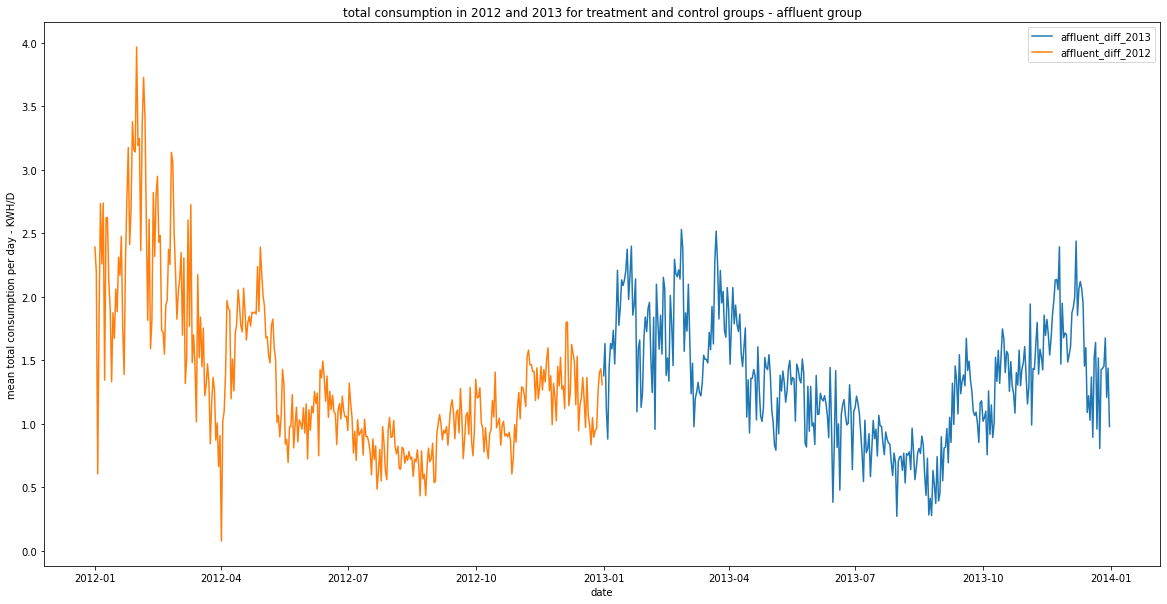

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(affluent_2013_day_sum[True].index, affluent_diff_2013, label="affluent_diff_2013")
ax.plot(affluent_2012_day_sum[True].index, affluent_diff_2012, label="affluent_diff_2012")

ax.legend(loc=1); # upper left corner
ax.set_xlabel('date')
ax.set_ylabel('mean total consumption per day - KWH/D')
ax.set_title('total consumption in 2012 and 2013 for treatment and control groups - affluent group');

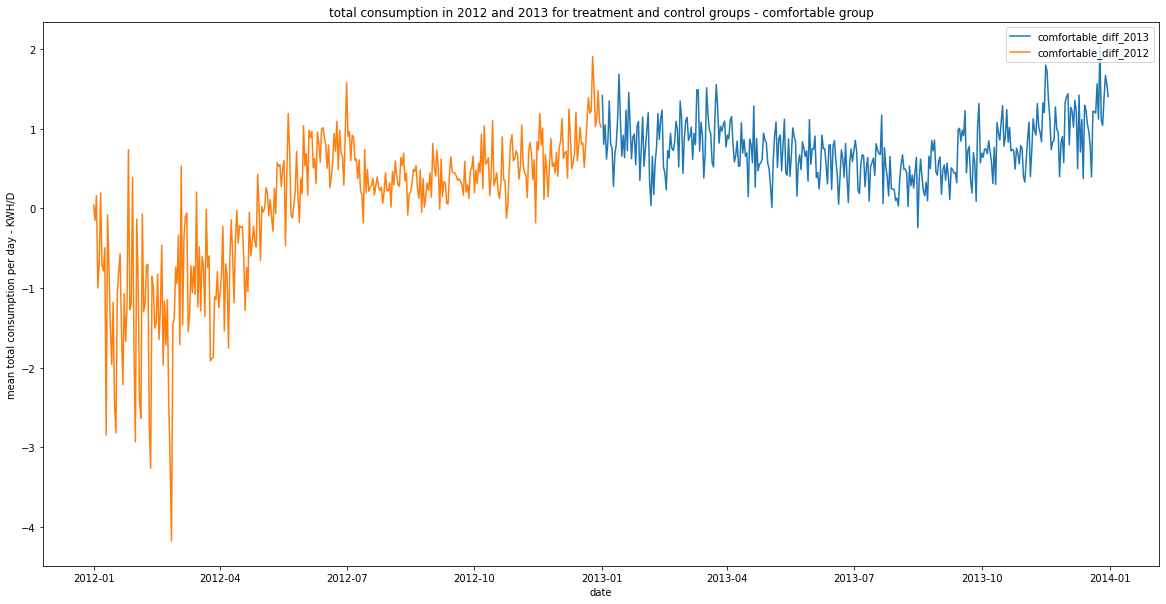

In [151]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(comfortable_2013_day_sum[True].index, comfortable_diff_2013, label="comfortable_diff_2013")
ax.plot(comfortable_2012_day_sum[True].index, comfortable_diff_2012, label="comfortable_diff_2012")

ax.legend(loc=1); # upper left corner
ax.set_xlabel('date')
ax.set_ylabel('mean total consumption per day - KWH/D')
ax.set_title('total consumption in 2012 and 2013 for treatment and control groups - comfortable group');

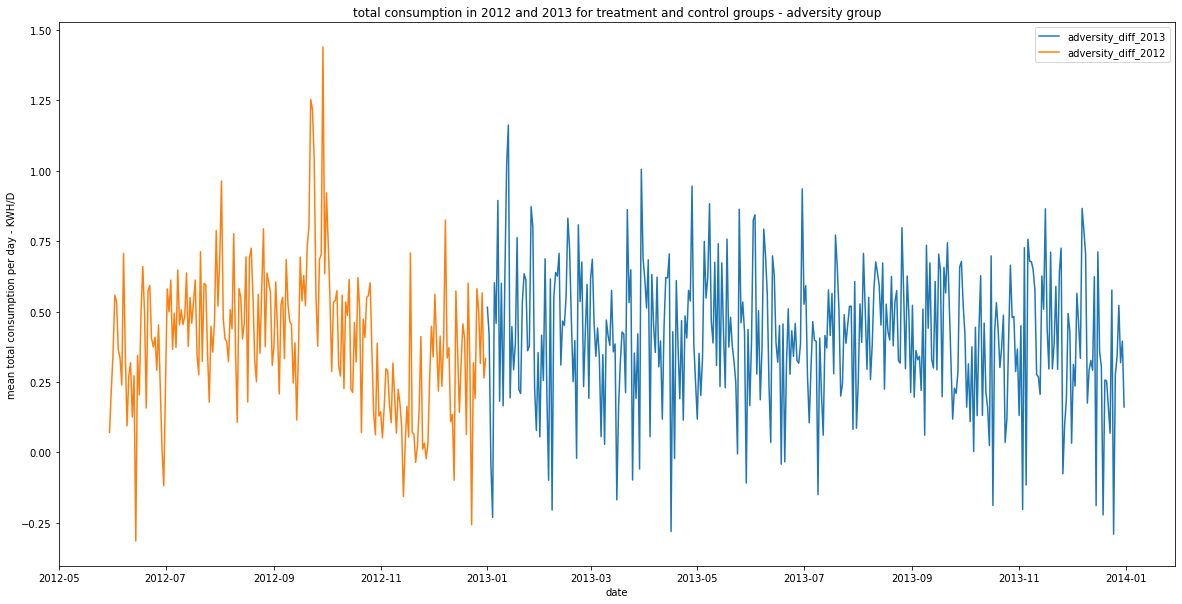

In [157]:
fig, ax = plt.subplots(figsize=(20, 10))
# ax.plot(affluent_2013_day_sum[True].index, affluent_diff_2013, label="affluent_diff_2013")
# ax.plot(affluent_2012_day_sum[True].index[150:], affluent_diff_2012[150:], label="affluent_diff_2012")
# ax.plot(comfortable_2013_day_sum[True].index, comfortable_diff_2013, label="comfortable_diff_2013")
# ax.plot(comfortable_2012_day_sum[True].index[150:], comfortable_diff_2012[150:], label="comfortable_diff_2012")
ax.plot(adversity_2013_day_sum[True].index, adversity_diff_2013, label="adversity_diff_2013")
ax.plot(adversity_2012_day_sum[True].index[150:], adversity_diff_2012[150:], label="adversity_diff_2012")

ax.legend(loc=1); # upper left corner
ax.set_xlabel('date')
ax.set_ylabel('mean total consumption per day - KWH/D')
ax.set_title('total consumption in 2012 and 2013 for treatment and control groups - adversity group');

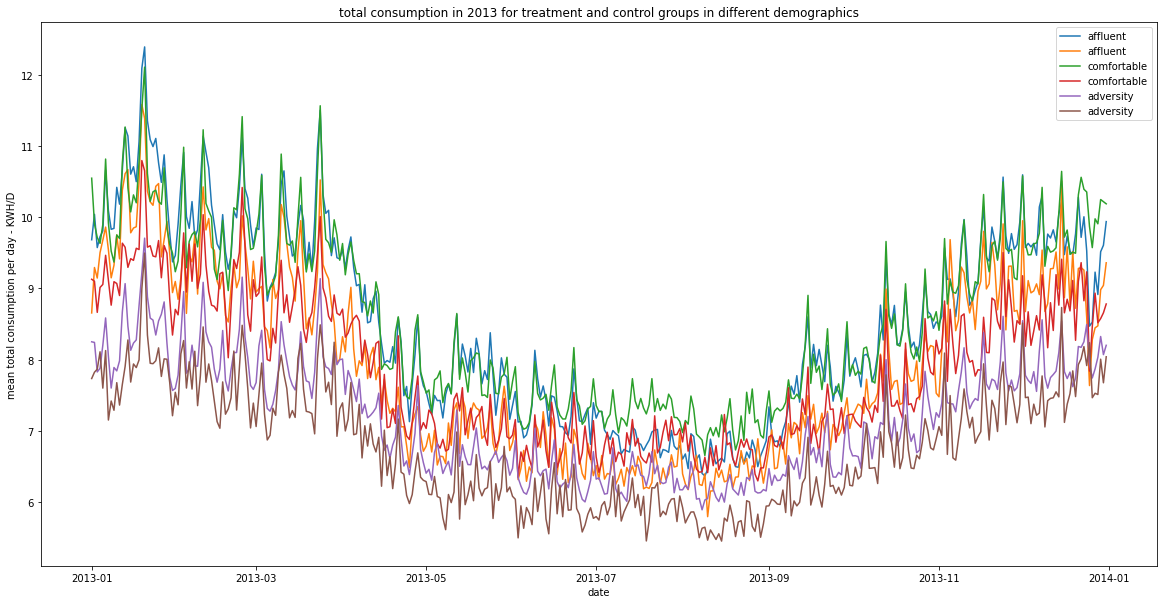

In [113]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(affluent_day_sum, label="affluent")
ax.plot(comfortable_day_sum, label="comfortable")
ax.plot(adversity_day_sum, label="adversity")

ax.legend(loc=1); # upper left corner
ax.set_xlabel('date')
ax.set_ylabel('mean total consumption per day - KWH/D')
ax.set_title('total consumption in 2013 for treatment and control groups in different demographics');

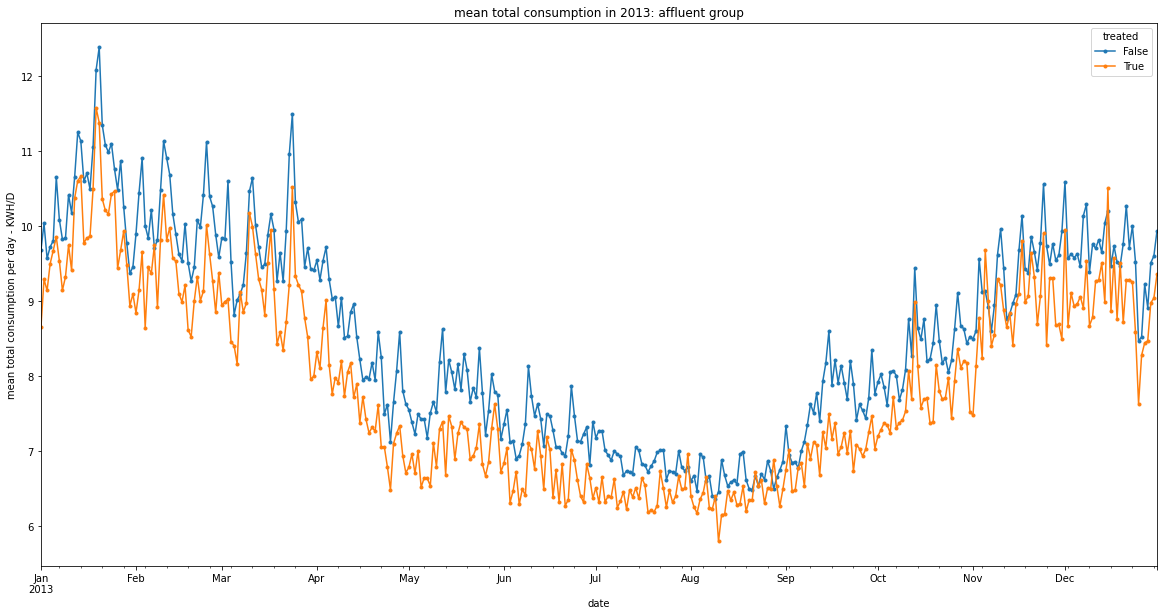

In [115]:
affluent_day_sum.plot(ylabel="mean total consumption per day - KWH/D", xlabel="date", 
                      title="mean total consumption in 2013: affluent group", marker='.', figsize=(20,10));

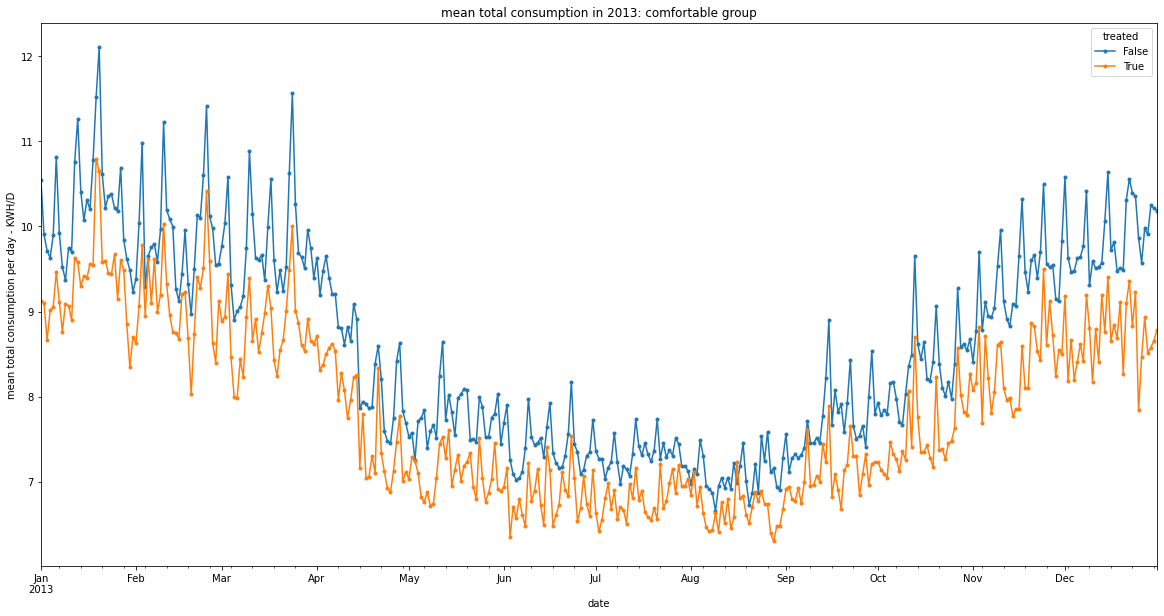

In [116]:
comfortable_day_sum.plot(ylabel="mean total consumption per day - KWH/D", xlabel="date", 
                      title="mean total consumption in 2013: comfortable group", marker='.', figsize=(20,10));

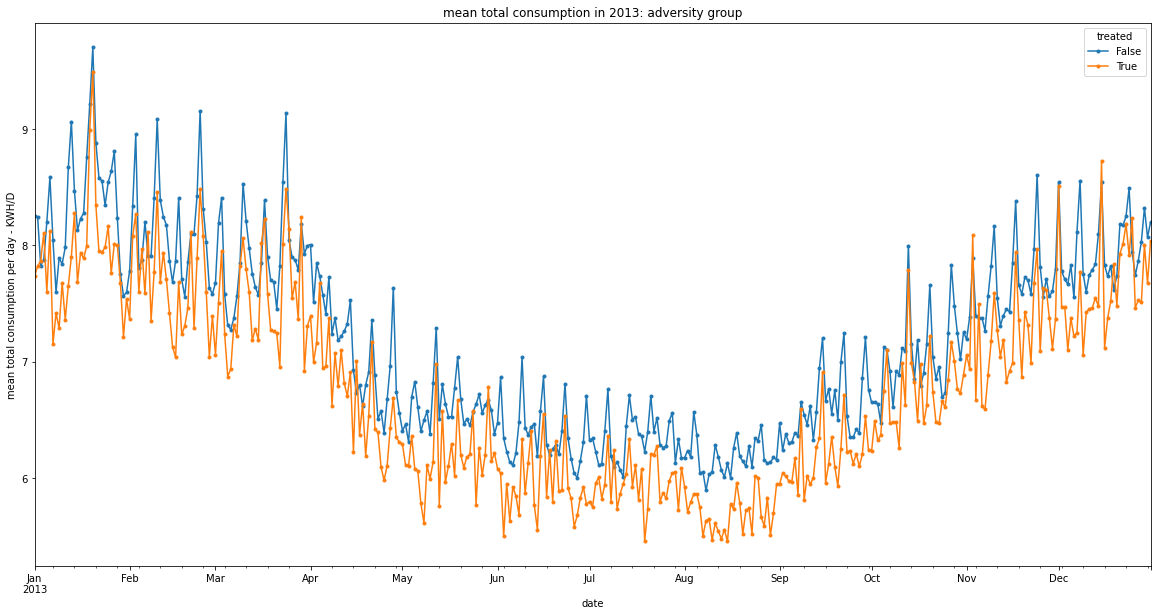

In [117]:
adversity_day_sum.plot(ylabel="mean total consumption per day - KWH/D", xlabel="date", 
                      title="mean total consumption in 2013: adversity group", marker='.', figsize=(20,10));

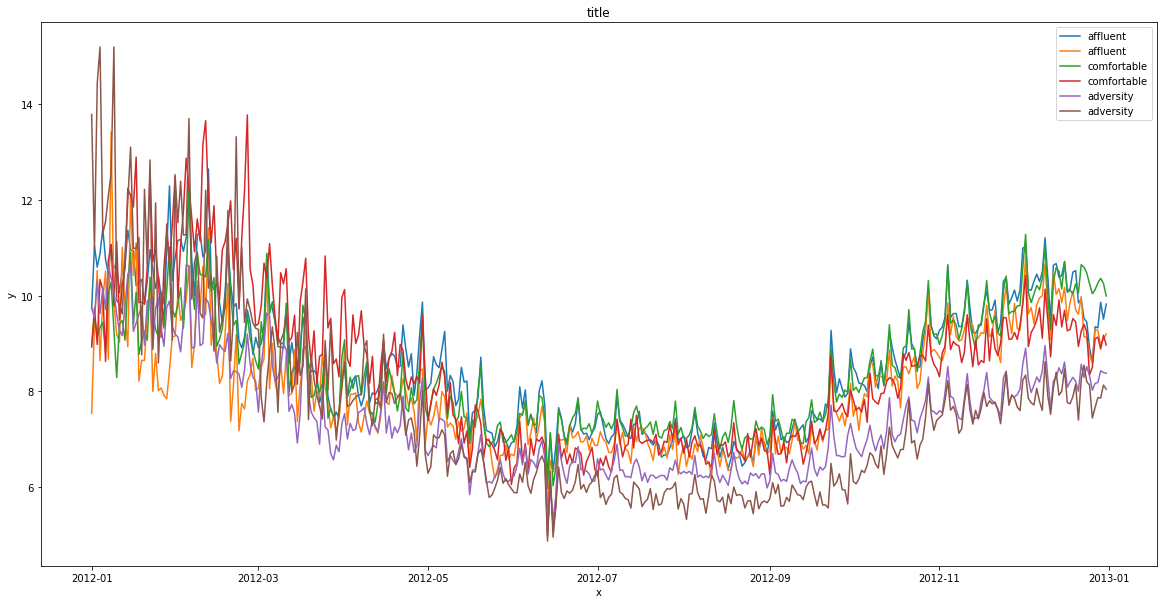

In [105]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(affluent_day_sum, label="affluent")
ax.plot(comfortable_day_sum, label="comfortable")
ax.plot(adversity_day_sum, label="adversity")

ax.legend(loc=1); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

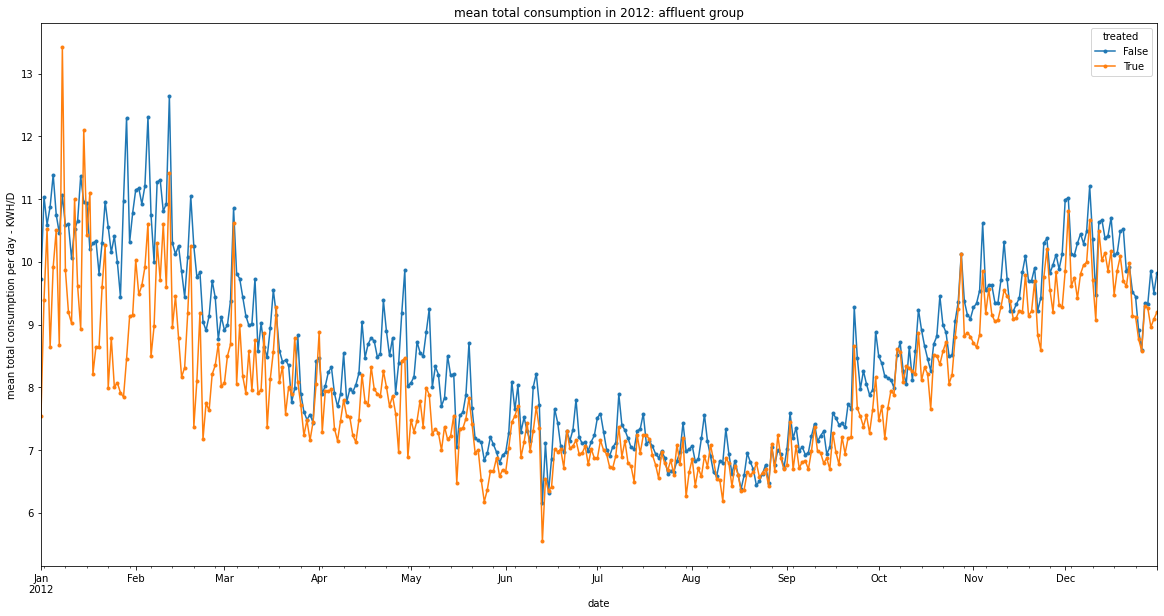

In [106]:
affluent_day_sum.plot(ylabel="mean total consumption per day - KWH/D", xlabel="date", 
                      title="mean total consumption in 2012: affluent group", marker='.', figsize=(20,10));

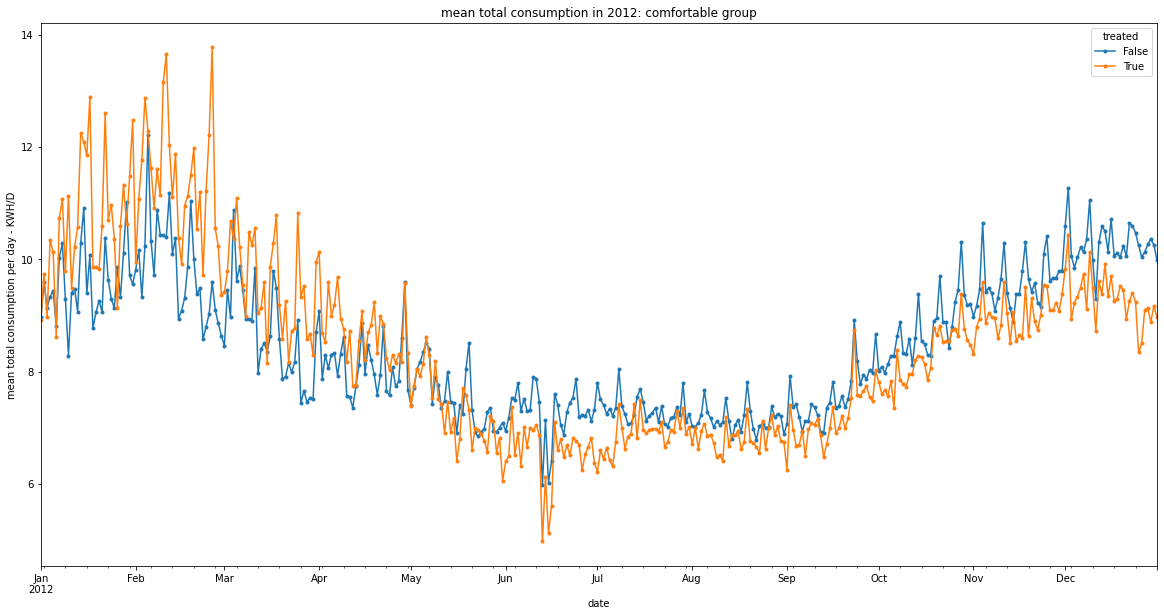

In [107]:
comfortable_day_sum.plot(ylabel="mean total consumption per day - KWH/D", xlabel="date", 
                      title="mean total consumption in 2012: comfortable group", marker='.', figsize=(20,10));

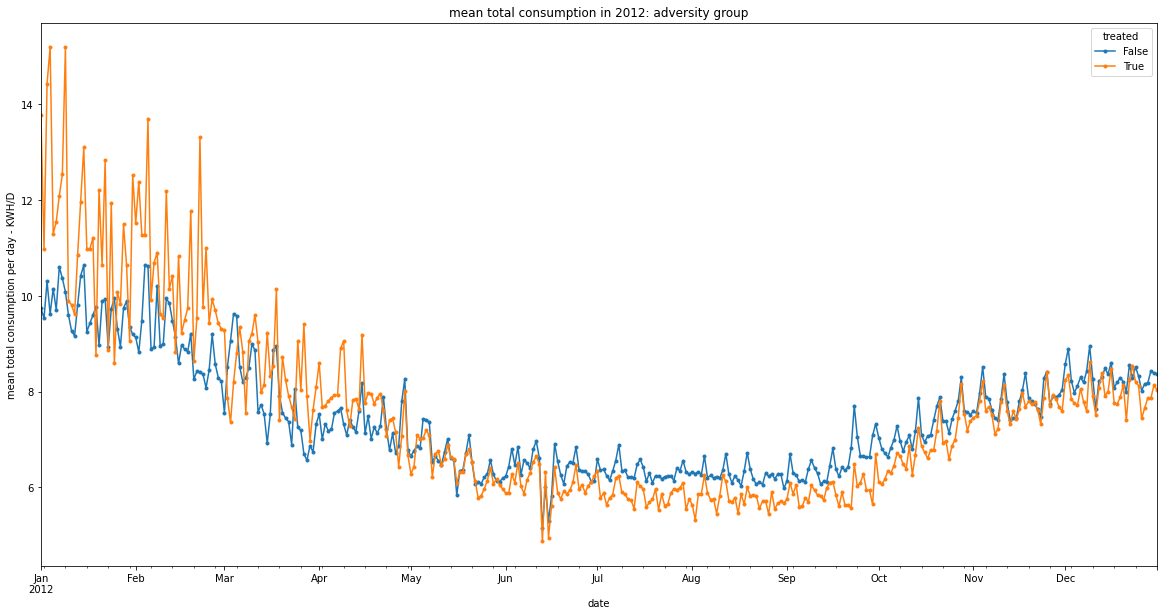

In [108]:
adversity_day_sum.plot(ylabel="mean total consumption per day - KWH/D", xlabel="date", 
                      title="mean total consumption in 2012: adversity group", marker='.', figsize=(20,10));

In [6]:
# separate the 2013 data into times that have low, normal, high tariffs
low_usage_2013 = total_usage_2013.loc[total_usage_2013['date_time'].isin(lows)]
normal_usage_2013 = total_usage_2013.loc[total_usage_2013['date_time'].isin(normals)]
high_usage_2013 = total_usage_2013.loc[total_usage_2013['date_time'].isin(highs)]

high_usage_2013.head()

house_id  treated           date_time  KWH/hh
334  MAC000002    False 2013-01-07 23:00:00   0.236
335  MAC000002    False 2013-01-07 23:30:00   0.277
336  MAC000002    False 2013-01-08 00:00:00   0.229
337  MAC000002    False 2013-01-08 00:30:00   0.251
338  MAC000002    False 2013-01-08 01:00:00   0.223

In [16]:
# group by house_id and hh time to see variance in usage
usage_2013_hh = total_usage_2013.groupby([total_usage_2013['date_time'].dt.time, total_usage_2013['treated']]).var()
usage_2012_hh = total_usage_2012.groupby([total_usage_2012['date_time'].dt.time, total_usage_2012['house_id']]).var()

usage_2013_hh.head()

treated    KWH/hh
date_time house_id                    
00:00:00  MAC000002    False  0.040811
          MAC000003    False  0.561342
          MAC000004    False  0.004831
          MAC000005    False  0.000498
          MAC000006    False  0.000628

In [12]:
winter_2013 = total_usage_2013.sort_values(by=['date_time'])[0:23271956]
winter_2013.reset_index(inplace=True, drop=True)
winter_2013.head()

house_id  treated  date_time  KWH/hh
0  MAC000002    False 2013-01-01   0.219
1  MAC003312    False 2013-01-01   0.084
2  MAC005503    False 2013-01-01   0.427
3  MAC001409    False 2013-01-01   0.158
4  MAC003313    False 2013-01-01   0.151

In [20]:
winter_2013_hh_mean = winter_2013.groupby([winter_2013['date_time'].dt.time, winter_2013['treated']]).mean()
winter_2013_hh_mean.head()

In [21]:
winter_2013_hh_mean = winter_2013_hh_mean.unstack()
winter_2013_hh_mean.head()

KWH/hh          
treated       False     True 
date_time                    
00:00:00   0.255168  0.204513
00:30:00   0.226574  0.175017
01:00:00   0.202675  0.153866
01:30:00   0.182927  0.138456
02:00:00   0.167168  0.128559

In [ ]:
# now let's fit a polynomiad (?) to the daily data to find the periodicity

In [29]:
len(winter_2013_hh_mean)

48

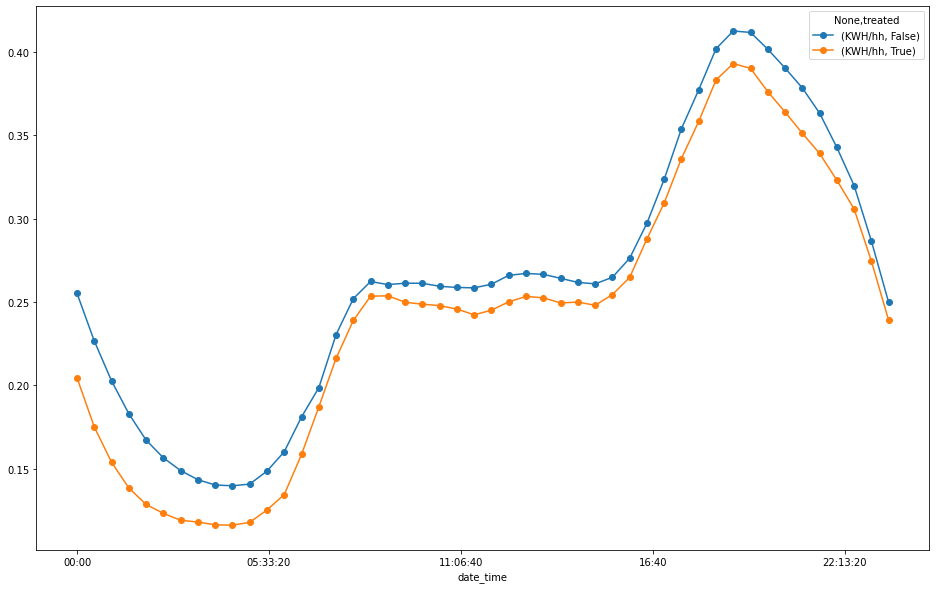

In [28]:
winter_2013_hh_mean.plot(marker='o', figsize=(16,10));

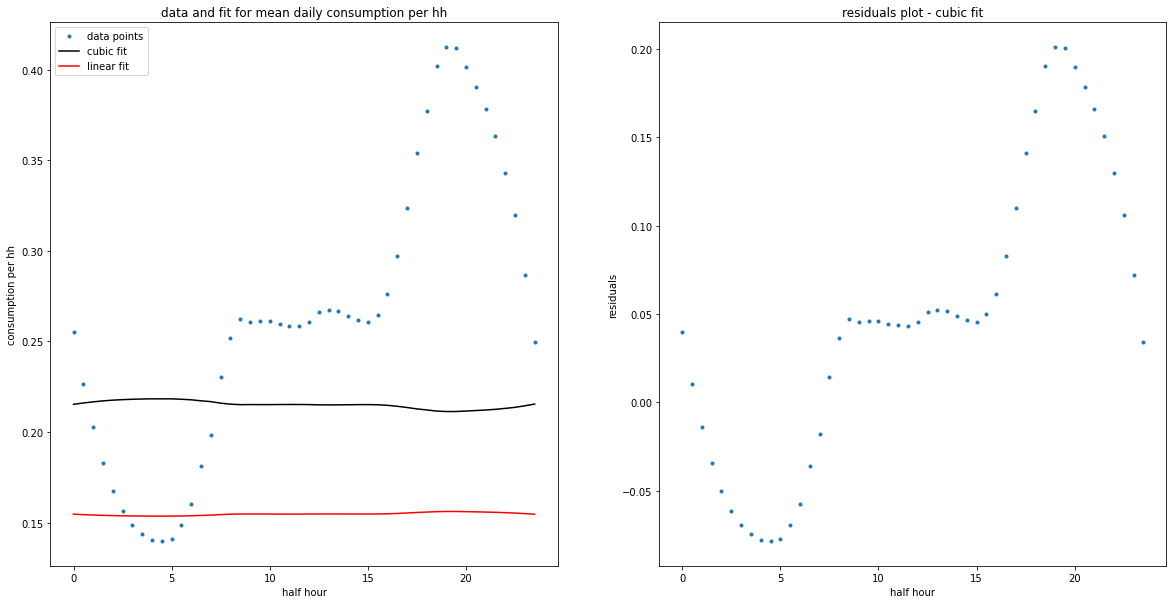

In [90]:
x = winter_2013_hh_mean[('KWH/hh', False)]
# y = winter_2013_hh_mean.index
y = np.arange(0, 24, 0.5)

# obtaining the y axis values for the fitting function
coef_3, coef_2, coef_1, intercept = np.polyfit(y, x, 3)
fit_cubic = coef_3 * x ** 3 + coef_2 * x ** 2 + coef_1 * x + intercept
coef_1, intercept = np.polyfit(y, x, 1)
fit_line = coef_1 * x + intercept

# plotting the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(y, x, '.', label = 'data points')
ax1.plot(y, fit_cubic, label = 'cubic fit', color='k')
ax1.plot(y, fit_line, label = 'linear fit', color='r')
ax1.set_title('data and fit for mean daily consumption per hh')
ax1.set_xlabel('half hour')
ax1.set_ylabel('consumption per hh')
ax1.legend()

ax2.plot(y, x - fit_cubic, '.')
ax2.set_title('residuals plot - cubic fit')
ax2.set_xlabel('half hour')
ax2.set_ylabel('residuals');

In [30]:
winter_2013_date_mean = winter_2013.groupby([winter_2013['date_time'], winter_2013['treated']]).mean()
winter_2013_date_mean.head()

KWH/hh
date_time           treated          
2013-01-01 00:00:00 False    0.261270
                    True     0.210156
2013-01-01 00:30:00 False    0.240669
                    True     0.195416
2013-01-01 01:00:00 False    0.219610

In [31]:
winter_2013_date_mean = winter_2013_date_mean.unstack()
winter_2013_date_mean.head()

KWH/hh          
treated                 False     True 
date_time                              
2013-01-01 00:00:00  0.261270  0.210156
2013-01-01 00:30:00  0.240669  0.195416
2013-01-01 01:00:00  0.219610  0.181383
2013-01-01 01:30:00  0.201582  0.165533
2013-01-01 02:00:00  0.184829  0.150789

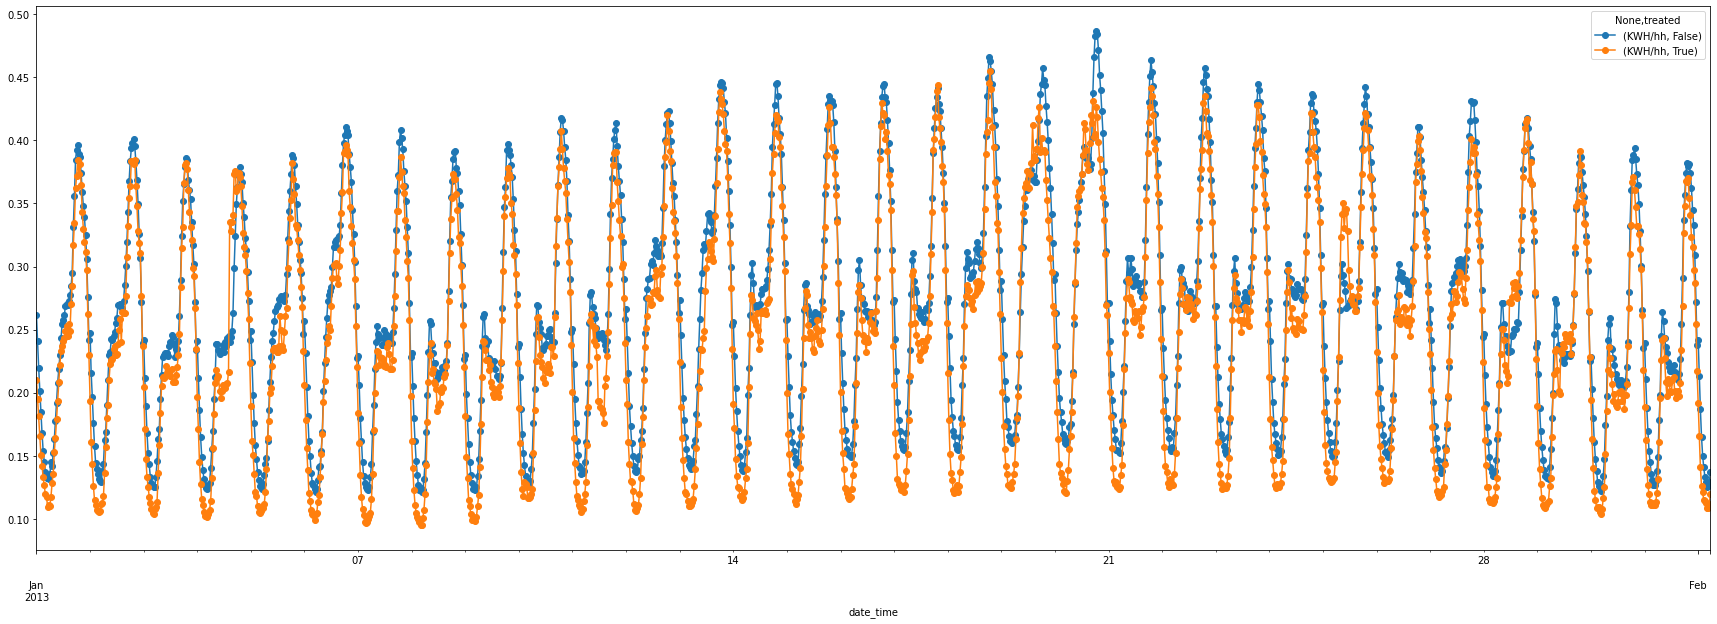

In [73]:
winter_2013_date_mean[0:1500].plot(marker='o', figsize=(30,10));

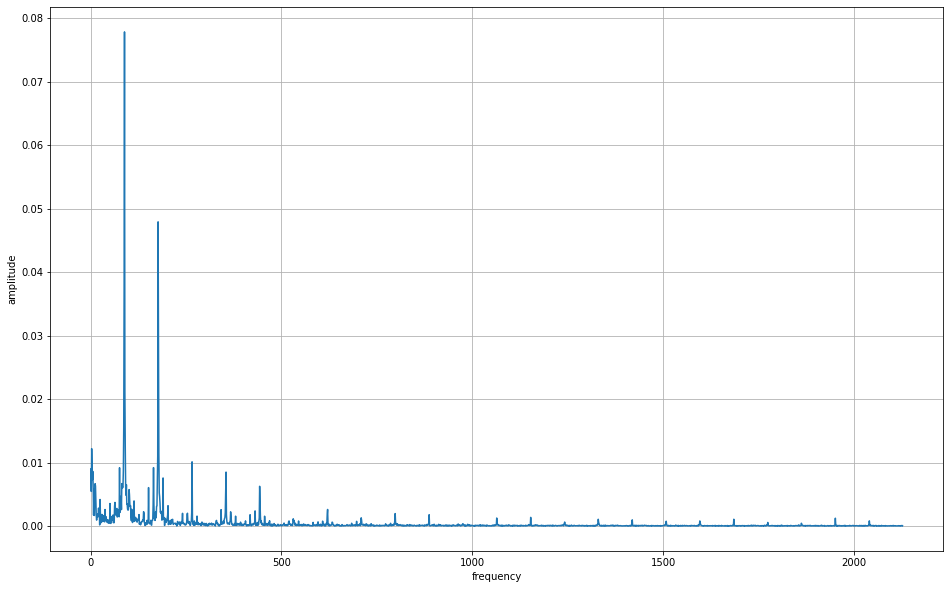

In [99]:
x = np.array(winter_2013_date_mean[('KWH/hh', False)])

from scipy.fft import fft, fftfreq
# Number of sample points
N = x.size
# sample spacing
T = 1.0 / N
yf = fft(x)
xf = fftfreq(N, T)[:N//2]
fig = plt.figure(figsize=(16, 10))
plt.plot(xf[1:], 2.0/N * np.abs(yf[1:N//2]))
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.grid()
plt.show()

In [106]:
yf[:N//2].argsort()[::-1]

array([  0,  89, 178, ...,  87,  88, 177])

In [108]:
yf[89] * sin()

NameError: name 'sin' is not defined

In [103]:
winter_2013_var = winter_2013.groupby([winter_2013['date_time'].dt.time, winter_2013['treated']]).var()

In [104]:
winter_2013_var = winter_2013_var.unstack()

<AxesSubplot:title={'center':'variance of usage over a certain hour over winter 2013 in treatment and untreated groups'}, xlabel='hour', ylabel='variance in KWH/hh'>

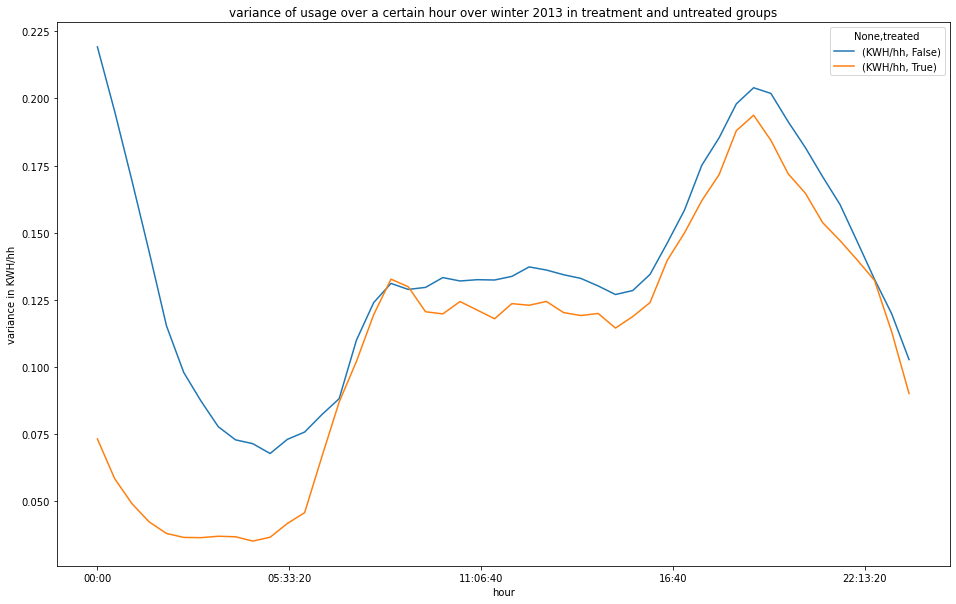

In [105]:
winter_2013_var.plot(ylabel="variance in KWH/hh", xlabel="hour", 
                               title="variance of usage over a certain hour over winter 2013 in treatment and untreated groups", figsize=(16,10))

In [84]:
variance_hh_2012 = total_usage_2012.groupby([total_usage_2012['date_time'].dt.time, total_usage_2012['treated']]).var()
variance_hh_2012 = variance_hh_2012.unstack()

variance_hh_2013 = total_usage_2013.groupby([total_usage_2013['date_time'].dt.time, total_usage_2013['treated']]).var()
variance_hh_2013 = variance_hh_2013.unstack()

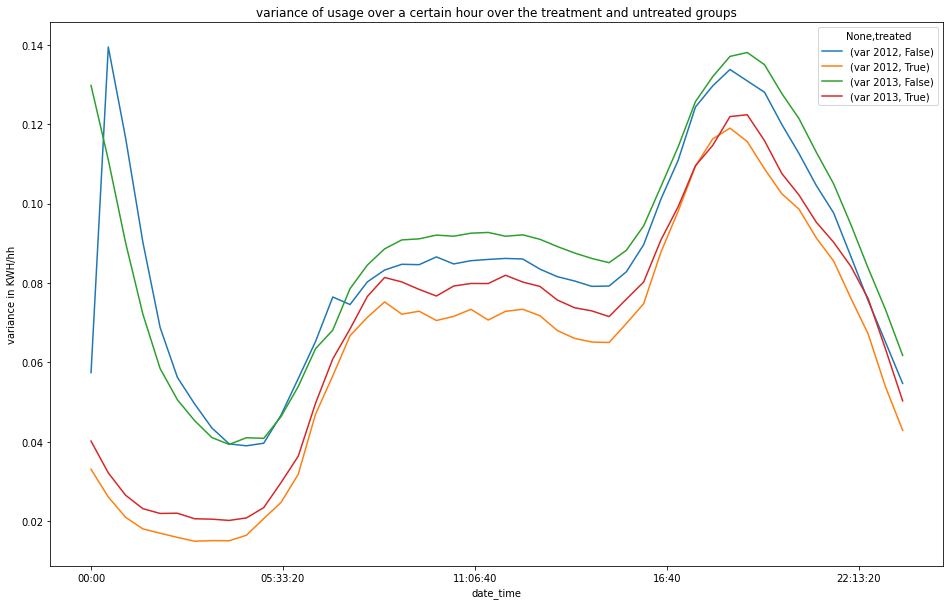

In [60]:
ax = variance_hh_2012.plot(ylabel="variance in KWH/hh", xlabel="hour", 
                               title="variance of usage over a certain hour over the treatment and untreated groups", figsize=(16,10))
variance_hh_2013.plot(ax=ax);

In [32]:
# grouped by date and house_id and summed over that period per day
low_usage_2013_day_sum = low_usage_2013.groupby([low_usage_2013['date_time'].dt.normalize(), low_usage_2013['house_id']]).sum().rename(columns={'KWH/hh': 'KWH/D'})
normal_usage_2013_day_sum = normal_usage_2013.groupby([normal_usage_2013['date_time'].dt.normalize(), normal_usage_2013['house_id']]).sum().rename(columns={'KWH/hh': 'KWH/D'})
high_usage_2013_day_sum = high_usage_2013.groupby([high_usage_2013['date_time'].dt.normalize(), high_usage_2013['house_id']]).sum().rename(columns={'KWH/hh': 'KWH/D'})

low_usage_2013_day_sum['treated'] = low_usage_2013_day_sum['treated'].astype('bool')
normal_usage_2013_day_sum['treated'] = normal_usage_2013_day_sum['treated'].astype('bool')
high_usage_2013_day_sum['treated'] = high_usage_2013_day_sum['treated'].astype('bool')

high_usage_2013_day_sum.head()

treated  KWH/D
date_time  house_id                 
2013-01-07 MAC000002    False  0.513
           MAC000003    False  0.295
           MAC000004    False  0.000
           MAC000005     True  0.264
           MAC000006    False  0.000

In [44]:
# grouped by date and treated, taken the mean over all house_ids in that group
low_usage_2013_day_sum_mean = low_usage_2013_day_sum.groupby([low_usage_2013_day_sum.index.get_level_values(0),'treated']).mean()
normal_usage_2013_day_sum_mean = normal_usage_2013_day_sum.groupby([normal_usage_2013_day_sum.index.get_level_values(0),'treated']).mean()
high_usage_2013_day_sum_mean = high_usage_2013_day_sum.groupby([high_usage_2013_day_sum.index.get_level_values(0),'treated']).mean()

high_usage_2013_day_sum_mean.head()

KWH/D
date_time  treated          
2013-01-07 False    0.499361
           True     0.454957
2013-01-08 False    0.777846
           True     0.535833
2013-01-11 False    1.474885

In [45]:
low_usage_2013_day_sum_mean_unstacked = low_usage_2013_day_sum_mean['KWH/D'].unstack()
normal_usage_2013_day_sum_mean_unstacked = normal_usage_2013_day_sum_mean['KWH/D'].unstack()
high_usage_2013_day_sum_mean_unstacked = high_usage_2013_day_sum_mean['KWH/D'].unstack()

high_usage_2013_day_sum_mean_unstacked.head()

treated        False     True 
date_time                     
2013-01-07  0.499361  0.454957
2013-01-08  0.777846  0.535833
2013-01-11  1.474885  1.175257
2013-01-13  2.517116  2.070167
2013-01-16  0.584445  0.533927

In [46]:
low_usage_2013_day_sum_mean_unstacked_renamed = low_usage_2013_day_sum_mean_unstacked.rename(columns={False: 'low_false', True: 'low_true'})
normal_usage_2013_day_sum_mean_unstacked_renamed = normal_usage_2013_day_sum_mean_unstacked.rename(columns={False: 'normal_false', True: 'normal_true'})
high_usage_2013_day_sum_mean_unstacked_renamed = high_usage_2013_day_sum_mean_unstacked.rename(columns={False: 'high_false', True: 'high_true'})

In [47]:
percentage = pd.concat([low_usage_2013_day_sum_mean_unstacked_renamed, normal_usage_2013_day_sum_mean_unstacked_renamed, high_usage_2013_day_sum_mean_unstacked_renamed], axis=1).fillna(0)

percentage['total_true'] = percentage['low_true'] + percentage['normal_true'] + percentage['high_true']
percentage['total_false'] = percentage['low_false'] + percentage['normal_false'] + percentage['high_false']

percentage.head()

treated     low_false  low_true  normal_false  normal_true  high_false  \
date_time                                                                
2013-01-01   0.000000    0.0000     12.020788    11.119585         0.0   
2013-01-02   0.000000    0.0000     12.215923    11.227296         0.0   
2013-01-03   0.000000    0.0000     11.573756    10.707836         0.0   
2013-01-04   1.539206    1.9278      9.972108     9.122533         0.0   
2013-01-05   0.000000    0.0000     11.934235    10.820518         0.0   

treated     high_true  total_true  total_false  
date_time                                       
2013-01-01        0.0   11.119585    12.020788  
2013-01-02        0.0   11.227296    12.215923  
2013-01-03        0.0   10.707836    11.573756  
2013-01-04        0.0   11.050333    11.511314  
2013-01-05        0.0   10.820518    11.934235

In [48]:
percentage['low_false'] = percentage['low_false'] / percentage['total_false']
percentage['normal_false'] = percentage['normal_false'] / percentage['total_false']
percentage['high_false'] = percentage['high_false'] / percentage['total_false']

percentage['low_true'] = percentage['low_true'] / percentage['total_true']
percentage['normal_true'] = percentage['normal_true'] / percentage['total_true']
percentage['high_true'] = percentage['high_true'] / percentage['total_true']

percentage

treated     low_false  low_true  normal_false  normal_true  high_false  \
date_time                                                                
2013-01-01   0.000000  0.000000      1.000000     1.000000    0.000000   
2013-01-02   0.000000  0.000000      1.000000     1.000000    0.000000   
2013-01-03   0.000000  0.000000      1.000000     1.000000    0.000000   
2013-01-04   0.133712  0.174456      0.866288     0.825544    0.000000   
2013-01-05   0.000000  0.000000      1.000000     1.000000    0.000000   
...               ...       ...           ...          ...         ...   
2013-12-27   0.515145  0.525101      0.141697     0.120705    0.343159   
2013-12-28   0.162229  0.139582      0.451919     0.461882    0.385853   
2013-12-29   0.000000  0.000000      0.858706     0.880590    0.141294   
2013-12-30   0.000000  0.000000      1.000000     1.000000    0.000000   
2013-12-31   0.000000  0.000000      1.000000     1.000000    0.000000   

treated     high_true  total_true  total_false  
date_time                                       
2013-01-01   0.000000   11.119585    12.020788  
2013-01-02   0.000000   11.227296    12.215923  
2013-01-03   0.000000   10.707836    11.573756  
2013-01-04   0.000000   11.050333    11.511314  
2013-01-05   0.000000   10.820518    11.934235  
...               ...         ...          ...  
2013-12-27   0.354193   10.987360    11.844921  
2013-12-28   0.398536   10.659079    11.869673  
2013-12-29   0.119410   11.165529    12.183508  
2013-12-30   0.000000   11.000525    12.022238  
2013-12-31   0.000000   11.221844    12.091455  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'percentage of usage per day in high / low hours'}, xlabel='time of the year', ylabel='percentange of usage'>

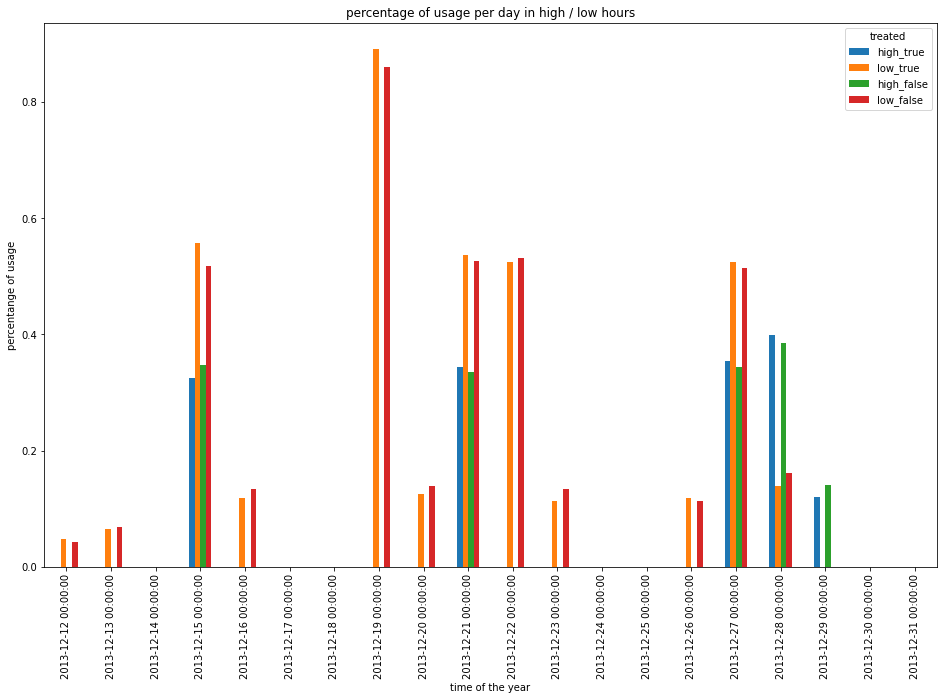

In [72]:
percentage[['high_true', 'low_true', 'high_false', 'low_false']][-20:].plot.bar(ylabel="percentange of usage", xlabel="time of the year", 
                               title="percentage of usage per day in high / low hours", figsize=(16,10))

In [161]:
from dateutil.relativedelta import relativedelta, MO

relativedelta(day=0.5)

In [166]:
percentage.index.get_level_values(0) - relativedelta(hours = 12)

TypeError: unsupported operand type(s) for -: 'DatetimeIndex' and 'relativedelta'

In [205]:
percentage.to_csv('percentage.csv', index=True)

https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

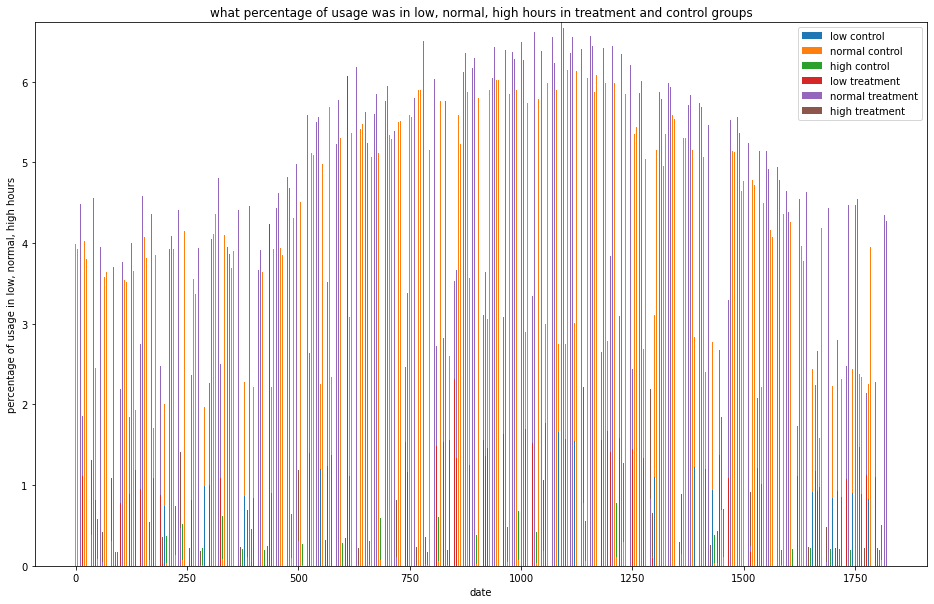

In [198]:
fig, ax = plt.subplots(figsize=(16, 10))
width = 1
x = np.arange(0, 5*len(percentage), 5)  # the label locations

# ax.bar(percentage.index.get_level_values(0), percentage['low_false'], width, label='low_false')
# ax.bar(percentage.index.get_level_values(0), percentage['normal_false'], width, label='normal_false')

ax.bar(x - width/2, percentage['low_false'], width, label='low control')
ax.bar(x - width/2, percentage['normal_false'], width, bottom = percentage['low_false'], label='normal control')
ax.bar(x - width/2, percentage['high_false'], width, bottom = percentage['normal_false'], label='high control')

ax.bar(x + width/2, percentage['low_true'], width, label='low treatment')
ax.bar(x + width/2, percentage['normal_true'], width, bottom = percentage['low_true'], label='normal treatment')
ax.bar(x + width/2, percentage['high_true'], width, bottom = percentage['normal_true'], label='high treatment')

ax.set_xlabel('date')
ax.set_ylabel('percentage of usage in low, normal, high hours')
ax.set_title('what percentage of usage was in low, normal, high hours in treatment and control groups')
ax.legend(loc='upper right')

plt.show()

In [79]:
diff_low = low_usage_2013_day_sum_mean_unstacked[False] - low_usage_2013_day_sum_mean_unstacked[True]
diff_normal = normal_usage_2013_day_sum_mean_unstacked[False] - normal_usage_2013_day_sum_mean_unstacked[True]
diff_high = high_usage_2013_day_sum_mean_unstacked[False] - high_usage_2013_day_sum_mean_unstacked[True]

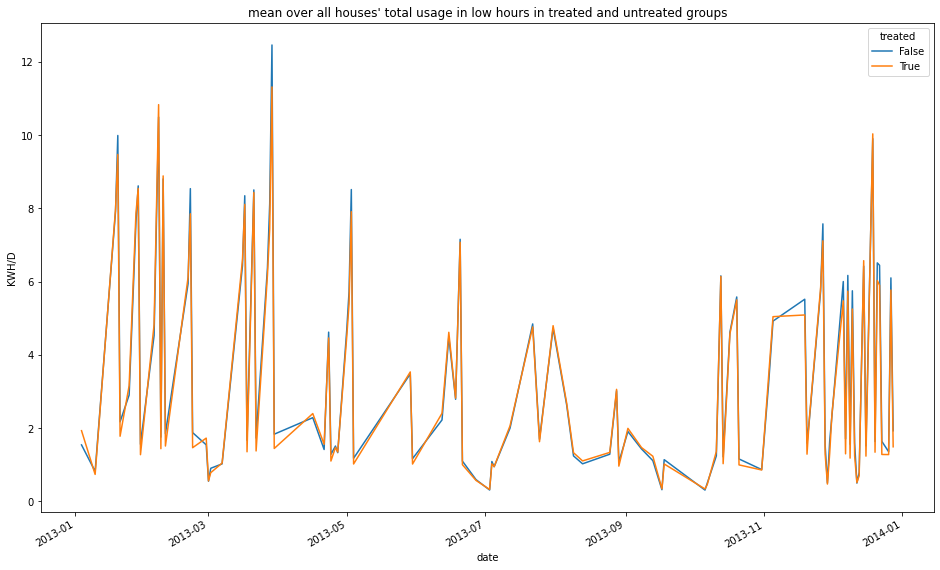

In [80]:
low_usage_2013_day_sum_mean_unstacked.plot(ylabel="KWH/D", xlabel="date", 
                               title="mean over all houses' total usage in low hours in treated and untreated groups", figsize=(16,10));

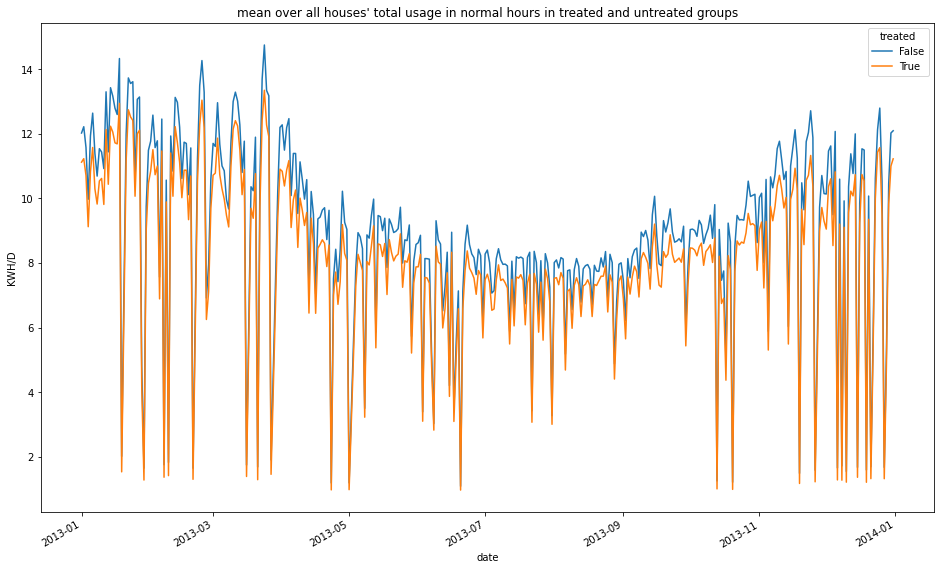

In [81]:
normal_usage_2013_day_sum_mean_unstacked.plot(ylabel="KWH/D", xlabel="date", 
                               title="mean over all houses' total usage in normal hours in treated and untreated groups", figsize=(16,10));

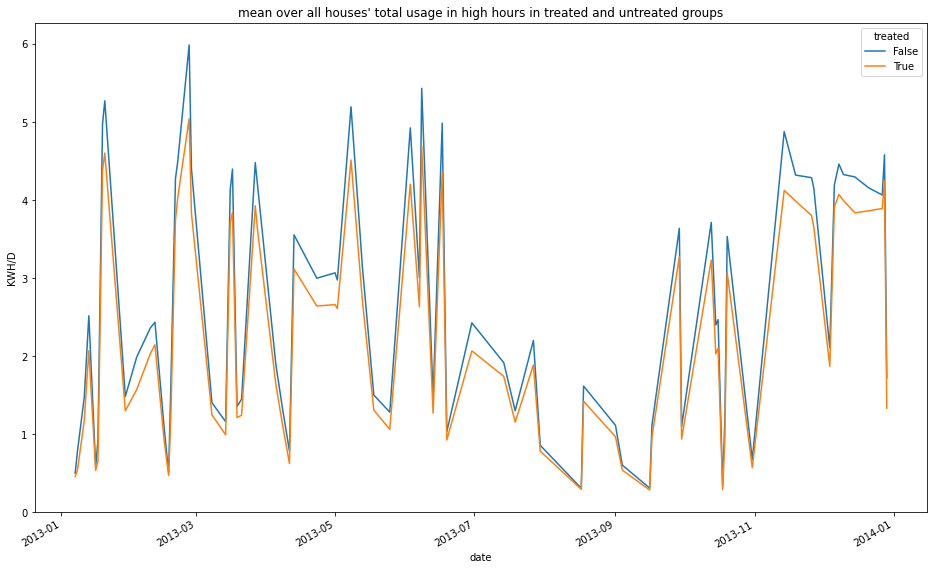

In [82]:
high_usage_2013_day_sum_mean_unstacked.plot(ylabel="KWH/D", xlabel="date", 
                               title="mean over all houses' total usage in high hours in treated and untreated groups", figsize=(16,10));

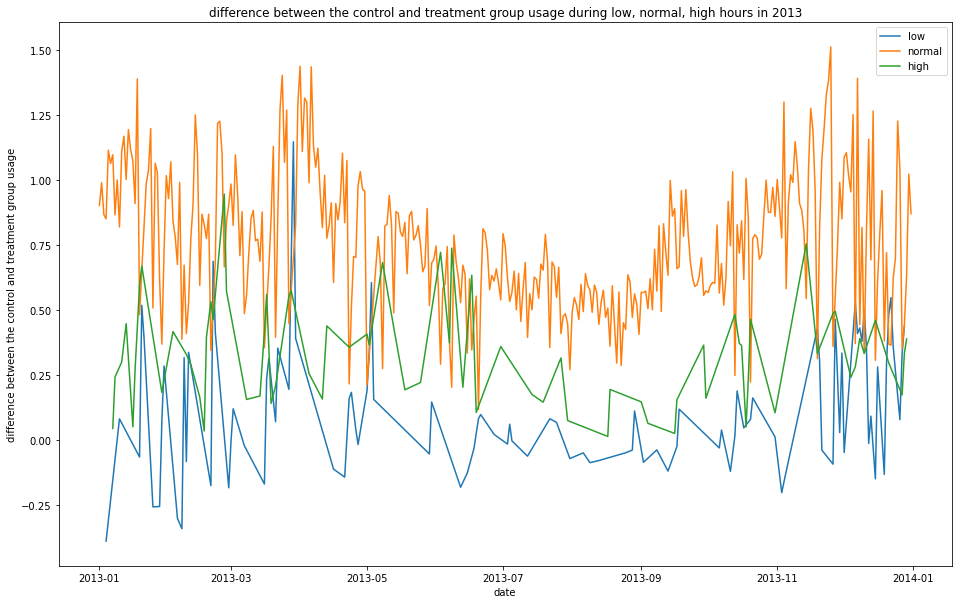

In [83]:
plt.figure(figsize=(16, 10))

plt.plot(diff_low.index, diff_low.values, markerfacecolor='blue', label='low')
plt.plot(diff_normal.index, diff_normal.values, markerfacecolor='red', label='normal')
plt.plot(diff_high.index, diff_high.values, markerfacecolor='green', label='high')

plt.xlabel('date')
plt.ylabel('difference between the control and treatment group usage')
plt.title('difference between the control and treatment group usage during low, normal, high hours in 2013')
plt.legend(loc='upper right');

In [206]:
diff_high.mean() #10%

0.33009373930570324

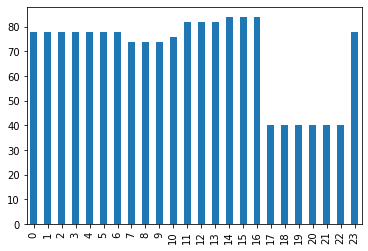

In [103]:
low_hours = Counter(lows.hour)
pd.Series(low_hours).sort_index().plot.bar();

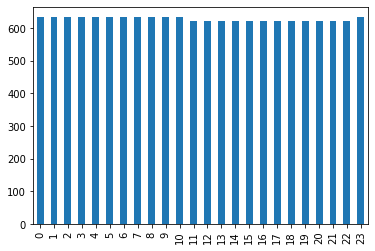

In [104]:
normal_hours = Counter(normals.hour)
pd.Series(normal_hours).sort_index().plot.bar();

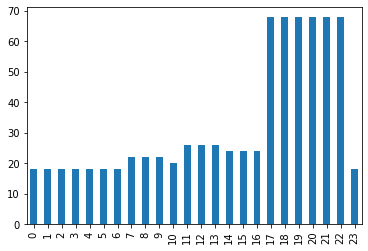

In [105]:
high_hours = Counter(highs.hour)
pd.Series(high_hours).sort_index().plot.bar();

SHIFTING?

In [45]:
mean_2013_by_treated = sum_2013_by_date.groupby([sum_2013_by_date['date_time'], sum_2013_by_date['treated']]).mean()
#mean_2013_by_treated_high = sum_2013_by_date_high.groupby([sum_2013_by_date_high['date_time'], sum_2013_by_date_high['treated']]).mean()
mean_2013_by_treated.head()

NameError: name 'sum_2013_by_date' is not defined

In [10]:
highs_by_date = highs['tariff'].groupby(highs['date_time'].dt.normalize()).count().rename('high')
lows_by_date = lows['tariff'].groupby(lows['date_time'].dt.normalize()).count().rename('low')
normals_by_date = normals['tariff'].groupby(normals['date_time'].dt.normalize()).count().rename('normal')
highs_by_date.head()

KeyError: 'tariff'

In [11]:
grouped_tariffs = pd.concat([highs_by_date, lows_by_date, normals_by_date], axis=1)
grouped_tariffs

NameError: name 'highs_by_date' is not defined

The conclusion here is that there is not a fixed number of hours with high, normal, low tariffs. There are some days that have high price
hours but some that don't at all. The df above shows the number of hh with each tariff amount for the treatment.

In [72]:
total_usage_2013 = total_usage_2013[total_usage_2013['date_time'].isin(tariffs.index)]

In [73]:
total_usage_2013.groupby([tariffs['tariff'].loc[total_usage_2013['date_time']], 'treated']).median()

ValueError: cannot reindex from a duplicate axis

In [528]:
sum_2013_by_date_high = high_tariff_usage_2013[['treated', 'p/hh']].groupby([high_tariff_usage_2013['date_time'].dt.normalize(), 
                                                                  high_tariff_usage_2013['house_id']]).sum()
sum_2013_by_date_high['treated'] = sum_2013_by_date_high['treated'].astype('bool')
sum_2013_by_date_high = sum_2013_by_date_high.reset_index()
sum_2013_by_date_high.head()

date_time   house_id  treated       p/hh
0 2013-01-07  MAC000002    False   7.298964
1 2013-01-07  MAC000003    False   4.197260
2 2013-01-07  MAC000004    False   0.000000
3 2013-01-07  MAC000005     True  17.740800
4 2013-01-07  MAC000006    False   0.000000

In [515]:
# the mean amount people paid per day when treated or untreated
# groupby date, house_id, sum
# per house_id i take the sum over the day
# for the treated (and untreated) i take the mean over all house_ids per day
# i plot for 2013
# mean_by_hh = total_usage_2013.resample('D', on='date_time')
# turn date_time to date
# group by date and then house_id
# sum over p/hh for house_id 
sum_2013_by_date = total_usage_2013[['treated', 'p/hh']].groupby([total_usage_2013['date_time'].dt.normalize(), 
                                                                  total_usage_2013['house_id']]).sum()
sum_2013_by_date['treated'] = sum_2013_by_date['treated'].astype('bool')
sum_2013_by_date = sum_2013_by_date.reset_index()
sum_2013_by_date.head()

date_time   house_id  treated        p/hh
0 2013-01-01  MAC000002    False  153.662400
1 2013-01-01  MAC000003    False  266.547353
2 2013-01-01  MAC000004    False   24.941684
3 2013-01-01  MAC000005     True   51.026640
4 2013-01-01  MAC000006    False    7.114000

In [550]:
annual_spending_per_house = sum_2013_by_date.groupby(sum_2013_by_date['house_id']).sum().rename(columns={'p/hh': 'p/Y'})
annual_spending_per_house_high = sum_2013_by_date_high.groupby(sum_2013_by_date_high['house_id']).sum().rename(columns={'p/hh': 'p/Y'})
annual_spending_per_house.head()

treated            p/Y
house_id                         
MAC000002        0   60007.500598
MAC000003        0  100012.339789
MAC000004        0    8803.532316
MAC000005      365   23434.029154
MAC000006        0   14999.769404

In [551]:
annual_spending = annual_spending_per_house.groupby(annual_spending_per_house['treated'] > 0)['p/Y'].mean()
annual_spending_high = annual_spending_per_house_high.groupby(annual_spending_per_house_high['treated'] > 0)['p/Y'].mean()
annual_spending.head()

treated
False    51321.021005
True     46044.598480
Name: p/Y, dtype: float64

In [491]:
max_date = total_usage_2013.groupby(total_usage_2013['house_id'])['treated', 'date_time'].max()

bad_data_treatment = max_date.loc[(max_date['date_time'] != '2013-12-31 23:30:00') & (max_date['treated'] == True)]
bad_data_control = max_date.loc[(max_date['date_time'] != '2013-12-31 23:30:00') & (max_date['treated'] == False)]

bad_data_treatment.head()

<ipython-input-491-1610aadfb5c2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_date = total_usage_2013.groupby(total_usage_2013['house_id'])['treated', 'date_time'].max()


treated           date_time
house_id                              
MAC000065     True 2013-07-07 23:30:00
MAC000071     True 2013-04-28 23:30:00
MAC000139     True 2013-09-30 00:00:00
MAC000146     True 2013-01-18 23:30:00
MAC000336     True 2013-09-30 00:00:00

In [552]:
control = annual_spending_per_house.loc[annual_spending_per_house['treated'] == 0, 'p/Y'].drop(index=bad_data_control.index).sort_values()
treatment = annual_spending_per_house.loc[annual_spending_per_house['treated'] > 0, 'p/Y'].drop(index=bad_data_treatment.index).sort_values()

control_high = annual_spending_per_house_high.loc[annual_spending_per_house_high['treated'] == 0, 
                                             'p/Y'].drop(index=bad_data_control.index).sort_values()
treatment_high = annual_spending_per_house_high.loc[annual_spending_per_house_high['treated'] > 0, 
                                               'p/Y'].drop(index=bad_data_treatment.index).sort_values()

control.head()

house_id
MAC004067     0.000000
MAC003627     0.000000
MAC002136     0.967504
MAC004672    10.272616
MAC002594    18.083788
Name: p/Y, dtype: float64

In [504]:
MAC000037 = total_usage_2013.loc[total_usage_2013['house_id'] == 'MAC000037', 'KWH/hh']

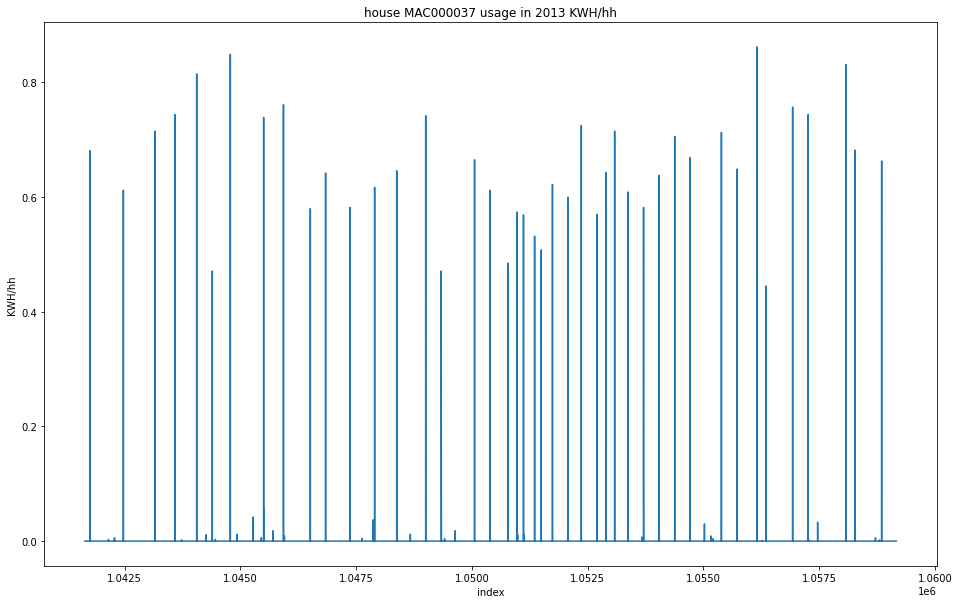

In [507]:
MAC000037.plot(ylabel="KWH/hh", xlabel="index", 
                               title="house MAC000037 usage in 2013 KWH/hh", figsize=(16,10));

In [494]:
control[0:50]

house_id
MAC004067       0.000000
MAC003627       0.000000
MAC002136       0.967504
MAC004672      10.272616
MAC002594      18.083788
MAC000197     132.363084
MAC001309     261.937480
MAC002564     315.719320
MAC000037     422.230128
MAC002388    1725.685664
MAC005313    3525.043912
MAC002873    4052.831572
MAC005472    4101.832804
MAC002328    4149.197816
MAC003031    4163.340448
MAC001043    4640.817900
MAC002744    4725.787516
MAC003928    4732.303940
MAC001462    4972.999016
MAC004317    5069.393716
MAC005033    5502.849736
MAC002258    5596.114276
MAC001803    5678.039100
MAC005558    5699.864851
MAC001898    5717.863272
MAC003096    6003.675336
MAC001218    6003.703792
MAC004828    6091.376727
MAC002761    6272.456484
MAC001349    6430.415740
MAC004760    6697.902140
MAC000404    6703.664483
MAC001737    6770.692588
MAC000427    6878.597740
MAC001079    6909.700148
MAC003017    7038.321268
MAC001681    7052.890743
MAC002072    7071.614788
MAC000652    7075.769364
MAC004023    713

In [567]:
treatment.mean() - treatment.std()

14302.90453897381

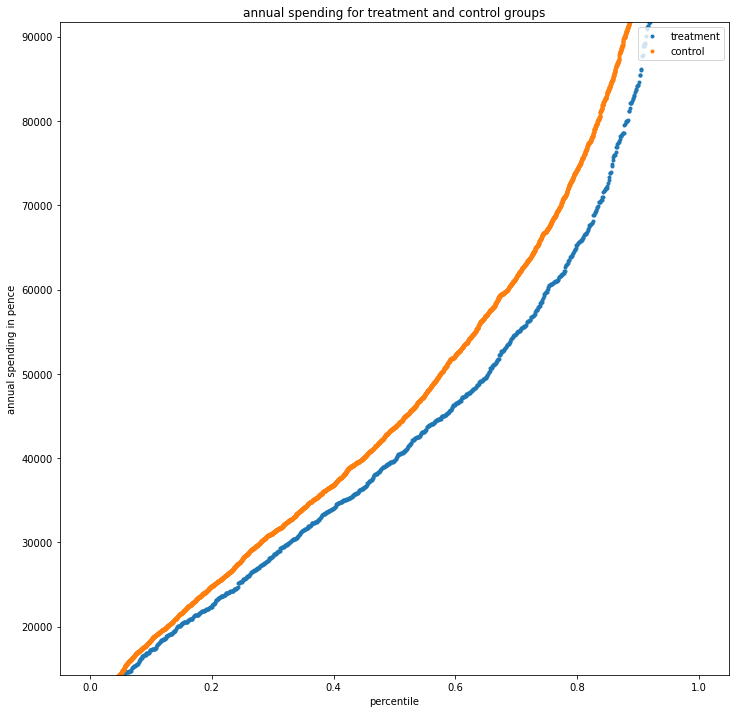

In [576]:
f, ax = plt.subplots()
f.set_figheight(12)
f.set_figwidth(12)
ax.plot(np.linspace(0, 1, len(treatment)), treatment.values, 'o', markersize=3)
ax.plot(np.linspace(0, 1, len(control)), control.values, 'o', markersize=3)
legend = ax.legend(['treatment', 'control'], loc='upper right')
# plt.ylim(12000, 120000)
plt.ylim(14302, 91672)
plt.xlabel('percentile')
plt.ylabel('annual spending in pence')
plt.title('annual spending for treatment and control groups')
# plt.savefig('annual_spending.png', facecolor='w')
plt.show()


In [570]:
treatment_high.mean() - treatment_high.std()

3251.630684323871

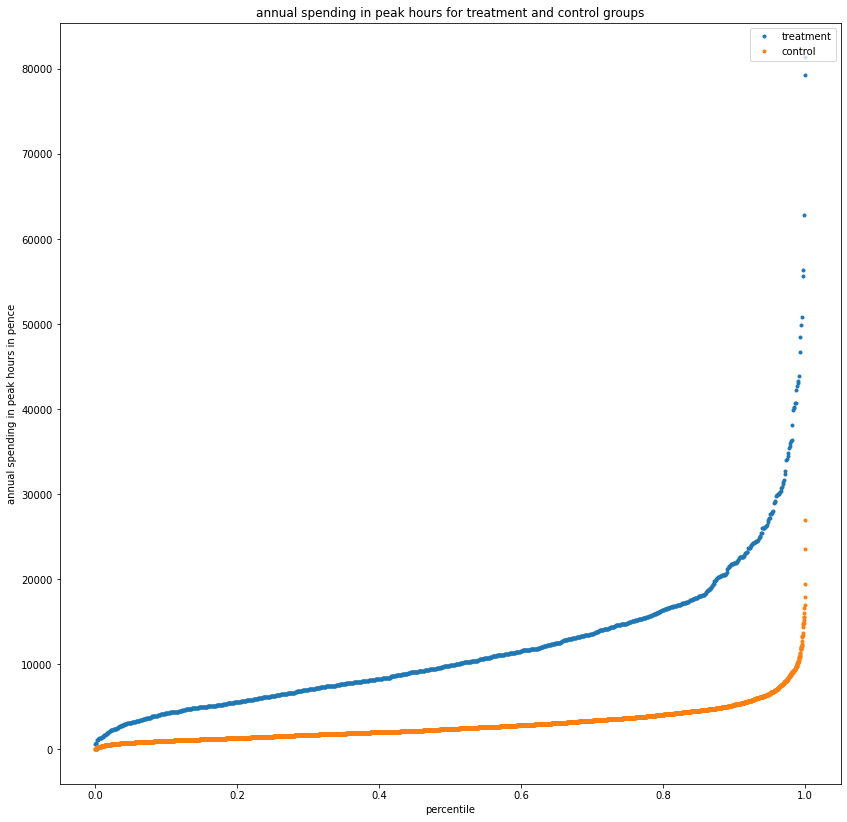

In [573]:
f, ax = plt.subplots()
f.set_figheight(14)
f.set_figwidth(14)
ax.plot(np.linspace(0, 1, len(treatment_high)), treatment_high.values, 'o', markersize=3)
ax.plot(np.linspace(0, 1, len(control_high)), control_high.values, 'o', markersize=3)
# ax.vlines(annual_spending.loc[False], 0, 4500, colors='k')
# ax.vlines(annual_spending.loc[True], 0, 4500, colors='g')
legend = ax.legend(['treatment', 'control'], loc='upper right')
# plt.ylim(12000)
plt.xlabel('percentile')
plt.ylabel('annual spending in peak hours in pence')
plt.title('annual spending in peak hours for treatment and control groups')
plt.show()


conditioned on the price being high (more reaction to the incentive because that's when)
the grid is stressed

In [530]:
mean_2013_by_treated_unstacked = mean_2013_by_treated['p/hh'].unstack()
mean_2013_by_treated_unstacked_high = mean_2013_by_treated_high['p/hh'].unstack()
mean_2013_by_treated_unstacked.head()

treated          False       True 
date_time                         
2013-01-01  171.031772  130.766320
2013-01-02  173.808159  132.033003
2013-01-03  164.671403  125.924153
2013-01-04  163.720914  114.972909
2013-01-05  169.800297  127.249297

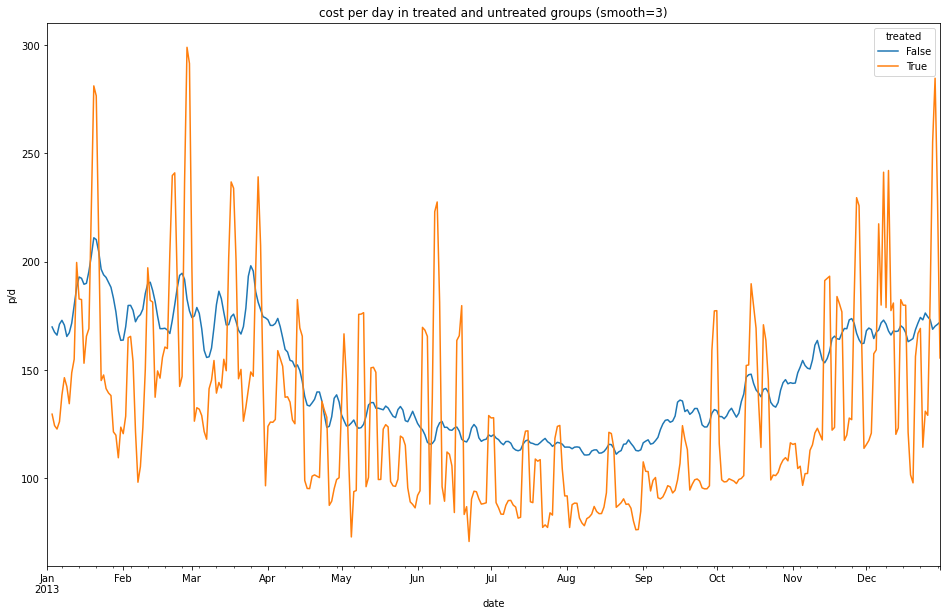

In [311]:
mean_2013_by_treated_unstacked.rolling(3).mean().plot(ylabel="p/d", xlabel="date", 
                               title="cost per day in treated and untreated groups (smooth=3)", figsize=(16,10));

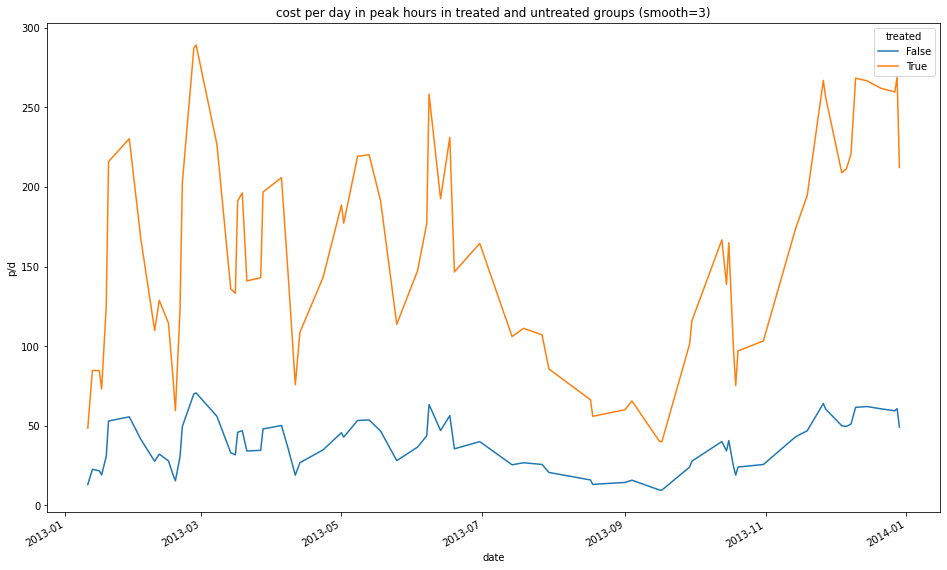

In [543]:
mean_2013_by_treated_unstacked_high.rolling(3).mean().plot(ylabel="p/d", xlabel="date", 
                               title="cost per day in peak hours in treated and untreated groups (smooth=3)", figsize=(16,10));

conclusion: in peak hours the treatment group spent more on electricity -- makes sense
tho their consumption per hh was lower and per day was almost the same (plots are later in the notebook)

In [416]:
# lets see if there are houses that always ignore the incentive (in isolation(X) or in a group)
# in high prices, compare avg consumption per house to their consumption
# look at annual spending on electricity -30%, let's look at those in peak hours
# we dont know if we're overpaying them
# 1) how can we change the hours? (can't do per house and can't change prices)
# for tighter margins we need an f(p, t) and see what happens in the p was h, n, l
# 2) can this assumption be applied? not important
# 3) consumption shifted or curtailed? can we estimate by how much? (in what timeframe)

----

# did the consumption at that price decrease or increase
# price vs consumption for the group that is treated 
# why is consumption peaking?
# what would they have done in the absense? how effective was this model?
# estimate the optimal strategy using this dataset using a cost function / objective function
# that we are minimizing
# assign a feature vector (select people based on features) 
# consumption is a function of the feature

----

# nasa london weather data 
# sule or bernardo help with ^

SyntaxError: invalid syntax (<ipython-input-416-3593e86ebf7b>, line 10)

In [14]:
time_stacked_mean_hh = mean_by_hh['p/hh'].unstack()
time_stacked_mean_hh.head()

treated                 False     True 
date_time                              
2013-01-01 00:00:00  3.717342  2.471431
2013-01-01 00:30:00  3.424241  2.298090
2013-01-01 01:00:00  3.124605  2.133059
2013-01-01 01:30:00  2.868103  1.946666
2013-01-01 02:00:00  2.629744  1.773283

In [ ]:
# first, i'm trying to see how much people paid for electricity per day
total_usage[total_usage['treated'] == True]

In [78]:
total_usage[total_usage['treated'] == True].tail()

house_id  treated           date_time  KWH/hh  price p/kWh
167932469  MAC005565     True 2012-06-21 05:30:00   1.022          0.0
167932470  MAC005565     True 2012-06-21 06:00:00   0.188          0.0
167932471  MAC005565     True 2012-06-21 06:30:00   0.073          0.0
167932472  MAC005565     True 2012-06-21 07:00:00   0.025          0.0
167932473  MAC005565     True 2012-12-19 12:32:41     NaN          0.0

In [45]:
total_usage['price p/kWh'] = 0

total_usage.loc[total_usage['treated'] == False, 'price p/kWh'] = 14.228

In [102]:
low_usage_2013.groupby([low_usage_2013['date_time'].dt.normalize(), 'treated']).sum()

KWH/hh
date_time  treated              
2013-01-04 False     6767.889999
           True      2141.785999
2013-01-10 False     3581.181000
           True       814.849000
2013-01-19 False    34779.259002
...                          ...
2013-12-26 True      1327.299000
2013-12-27 False    24767.392999
           True      6006.026998
2013-12-28 False     7819.876997
           True      1550.304001

[208 rows x 1 columns]

In [213]:
group_hours = {k: 0 for k in [range(0, 6), range(6, 11), range(11, 16), range(16, 21), range(21, 24)]}

In [219]:
group_hours

{range(0, 6): 0,
 range(6, 11): 0,
 range(11, 16): 0,
 range(16, 21): 0,
 range(21, 24): 0}

In [268]:
def group_hours(d):
    group_hours = {k: 0 for k in [range(0, 6), range(6, 11), range(11, 16), range(16, 21), range(21, 24)]}
    for k, v in d.items():
        for g in group_hours:
            if k in g:
                group_hours[g] += v
    trans = {
         range(0, 6): 'overnight: [0-6)',
         range(6, 11): 'morning: [6-11)',
         range(11, 16): 'mid-day: [11-16)',
         range(16, 21): 'eod: [16-21)',
         range(21, 24): 'night: [21-24)'
    }
    return {trans[k]: v for k, v in group_hours.items()}

In [269]:
grouped_low_count = group_hours(low_count)
grouped_normal_count = group_hours(normal_count)
grouped_high_count = group_hours(high_count)

In [270]:
grouped_low_count

{'overnight: [0-6)': 468,
 'morning: [6-11)': 376,
 'mid-day: [11-16)': 414,
 'eod: [16-21)': 244,
 'night: [21-24)': 158}

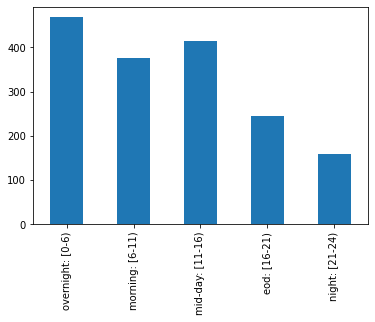

In [271]:
pd.Series(grouped_low_count).plot.bar();

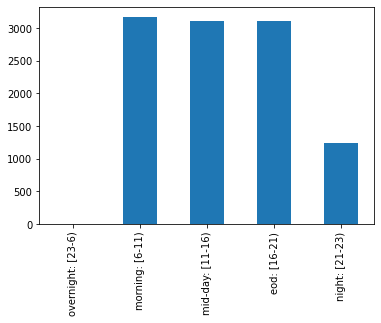

In [264]:
pd.Series(grouped_normal_count).plot.bar();

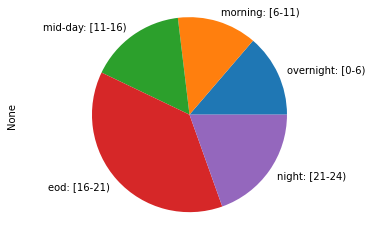

In [235]:
pd.Series(grouped_high_count).plot(kind='pie')
plt.axis('equal')
plt.show();

In [306]:
sum_median_usage_hh_2011 = sum_median_usage_hh(total_usage_2011)
sum_median_usage_hh_2012 = sum_median_usage_hh(total_usage_2012)
sum_median_usage_hh_2014 = sum_median_usage_hh(total_usage_2014)

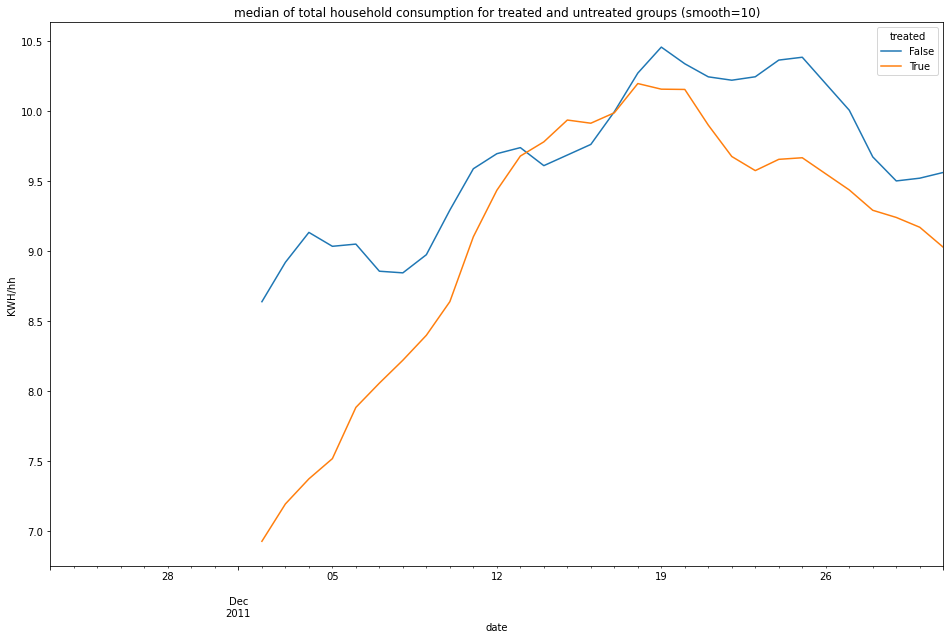

In [307]:
sum_median_usage_hh_2011.rolling(10).mean().plot(ylabel="KWH/hh", xlabel="date", 
            title="median of total household consumption for treated and untreated groups (smooth=10)", figsize=(16,10));

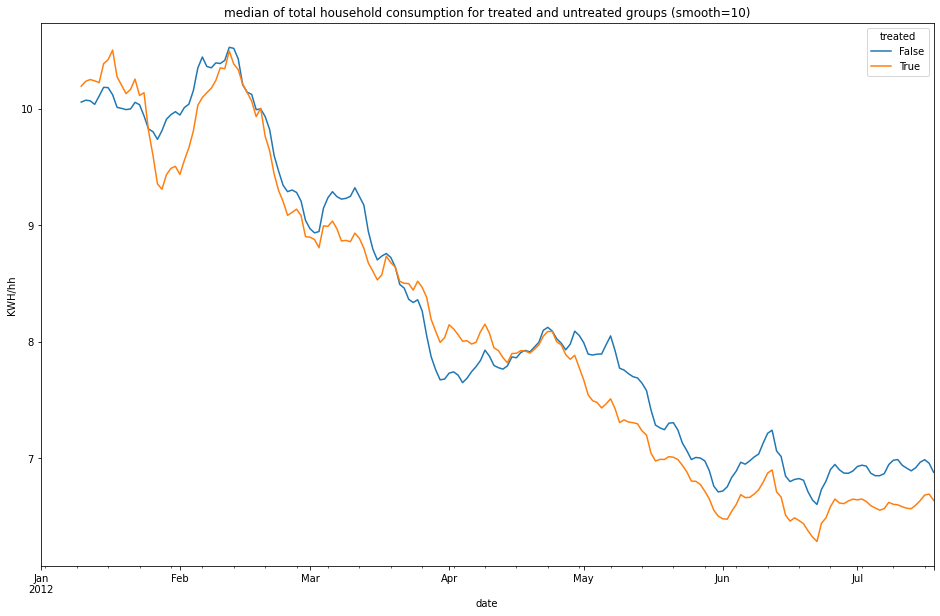

In [370]:
sum_median_usage_hh_2012[0:200].rolling(10).mean().plot(ylabel="KWH/hh", xlabel="date", 
            title="median of total household consumption for treated and untreated groups (smooth=10)", figsize=(16,10));

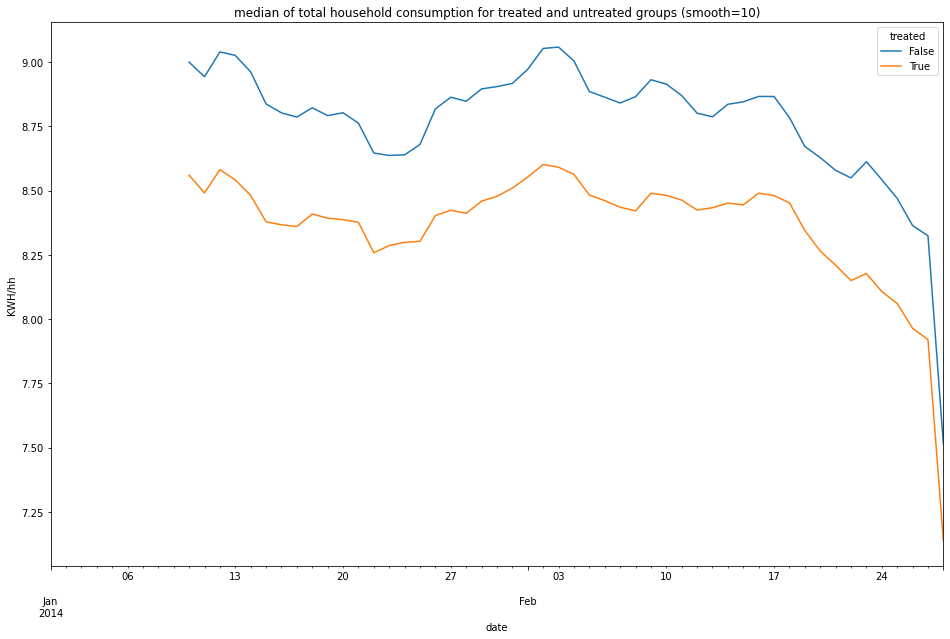

In [309]:
sum_median_usage_hh_2014.rolling(10).mean().plot(ylabel="KWH/hh", xlabel="date", 
            title="median of total household consumption for treated and untreated groups (smooth=10)", figsize=(16,10));

In [341]:
hours_2013 = high_usage_2013.groupby([high_usage_2013['date_time'].dt.time, 'house_id']).sum()
hours_2013_grouped = hours_2013.groupby([hours_2013.index.get_level_values(0), hours_2013['treated'] != 0])['KWH/hh'].median().unstack()
hours_2013_grouped['diff'] = hours_2013_grouped[False] - hours_2013_grouped[True]
hours_2013_grouped.head()

treated    False    True    diff
date_time                       
00:00:00   1.046  0.9445  0.1015
00:30:00   0.911  0.7900  0.1210
01:00:00   0.832  0.7440  0.0880
01:30:00   0.775  0.7010  0.0740
02:00:00   0.705  0.6490  0.0560

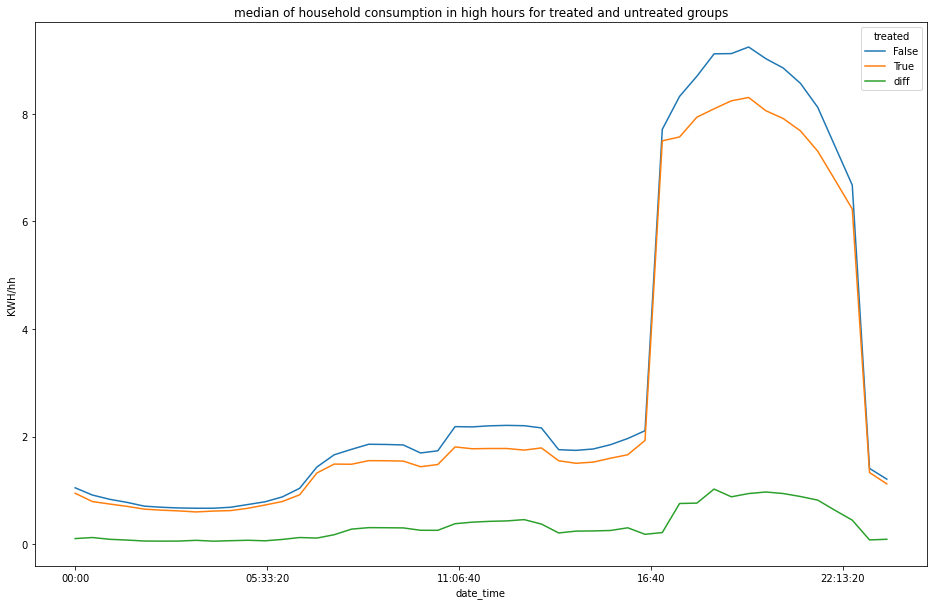

In [363]:
hours_2013_grouped.plot(ylabel="KWH/hh", xlabel="date_time", 
            title="median of household consumption in high hours for treated and untreated groups", figsize=(16,10));

In [344]:
hours_2011 = total_usage_2011.groupby([total_usage_2011['date_time'].dt.time, 'house_id']).sum()
hours_2011_grouped = hours_2011.groupby([hours_2011.index.get_level_values(0), hours_2011['treated'] != 0])['KWH/hh'].median().unstack()
hours_2011_grouped['diff'] = hours_2011_grouped[False] - hours_2011_grouped[True]
hours_2011_grouped.head()

treated     False   True    diff
date_time                       
00:00:00   2.8760  4.447 -1.5710
00:30:00   2.5360  3.160 -0.6240
01:00:00   2.2650  2.631 -0.3660
01:30:00   1.9685  2.472 -0.5035
02:00:00   1.7780  2.200 -0.4220

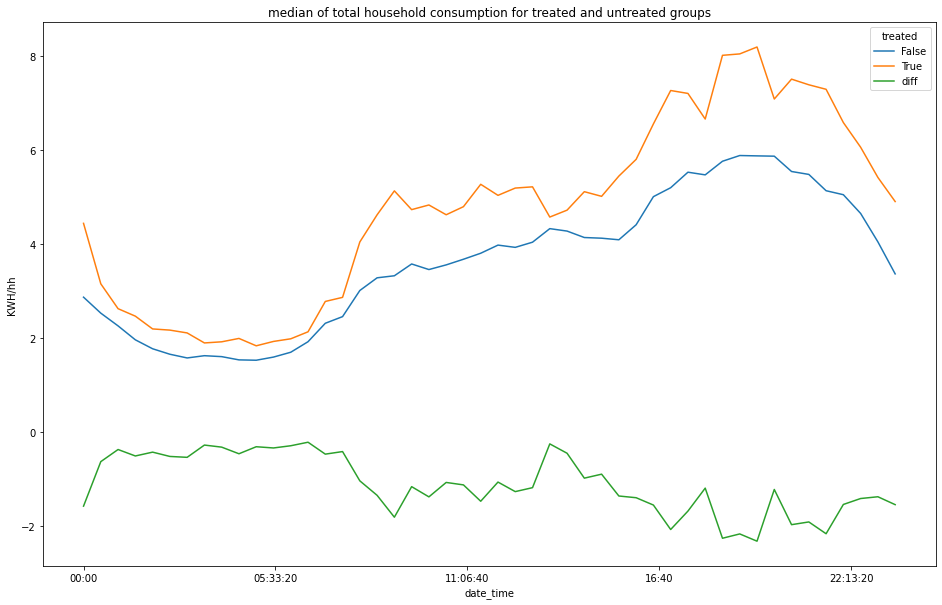

In [362]:
hours_2011_grouped.plot(ylabel="KWH/hh", xlabel="date_time", 
            title="median of total household consumption for treated and untreated groups", figsize=(16,10));

In [367]:
hours_2012 = total_usage_2012.groupby([total_usage_2012['date_time'].dt.time, 'house_id']).sum()
hours_2012_grouped = hours_2012.groupby([hours_2012.index.get_level_values(0), hours_2012['treated'] != 0])['KWH/hh'].median().unstack()
hours_2012_grouped['diff'] = hours_2012_grouped[False] - hours_2012_grouped[True]
hours_2012_grouped.head()

treated      False     True    diff
date_time                          
00:00:00   26.6670  25.3505  1.3165
00:30:00   22.9705  21.3250  1.6455
01:00:00   20.6905  19.6390  1.0515
01:30:00   19.4330  17.9655  1.4675
02:00:00   18.3945  16.9770  1.4175

In [365]:
len(hours_2012_grouped)

716

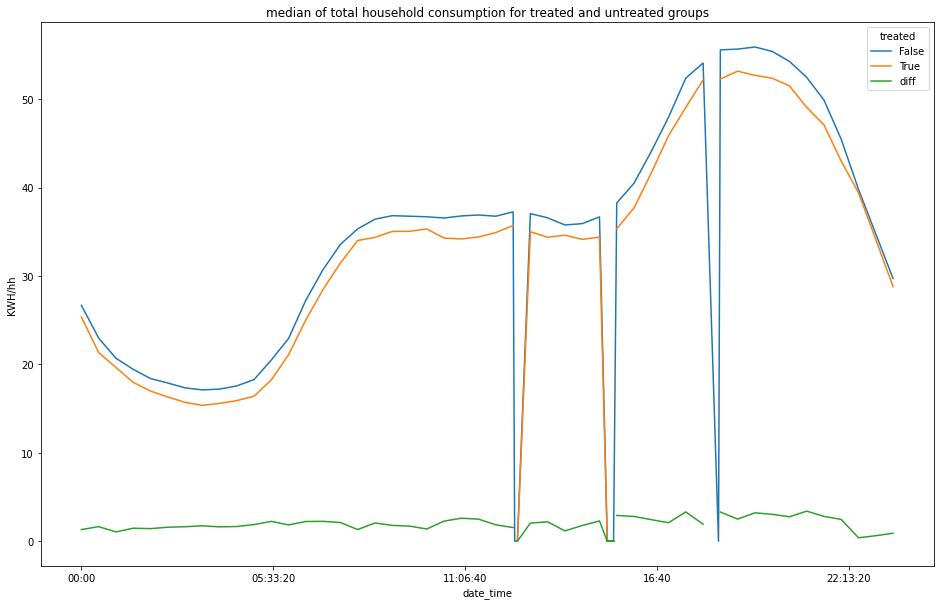

In [361]:
hours_2012_grouped.plot(ylabel="KWH/hh", xlabel="date_time", 
            title="median of total household consumption for treated and untreated groups", figsize=(16,10));

In [358]:
hours_2014 = total_usage_2014.groupby([total_usage_2014['date_time'].dt.time, 'house_id']).sum()
hours_2014_grouped = hours_2014.groupby([hours_2014.index.get_level_values(0), hours_2014['treated'] != 0])['KWH/hh'].median().unstack()
hours_2014_grouped['diff'] = hours_2014_grouped[False] - hours_2014_grouped[True]
hours_2014_grouped.head()

treated     False   True    diff
date_time                       
00:00:00   8.5435  8.017  0.5265
00:30:00   6.9360  6.728  0.2080
01:00:00   5.9270  5.784  0.1430
01:30:00   5.3370  5.146  0.1910
02:00:00   4.9250  4.676  0.2490

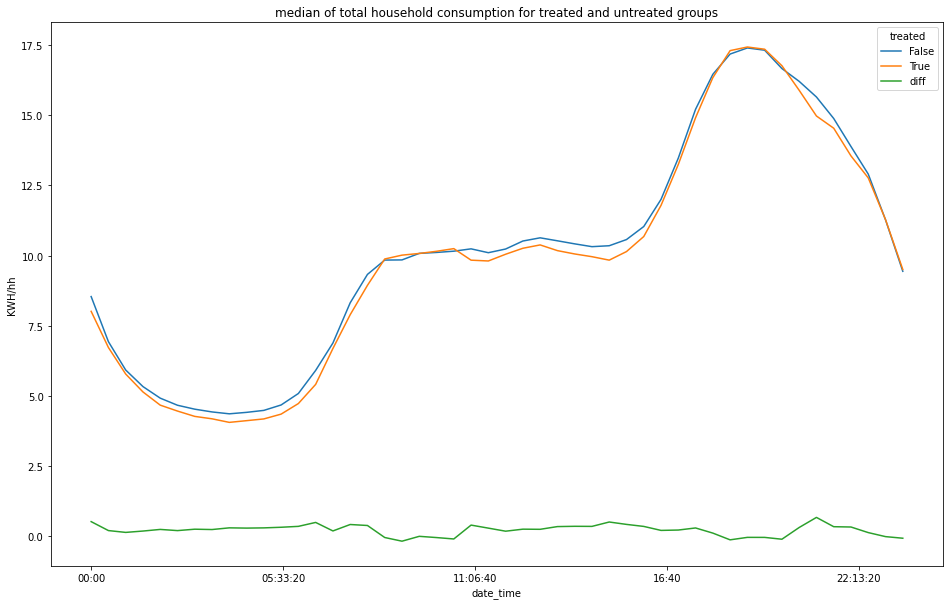

In [360]:
hours_2014_grouped.plot(ylabel="KWH/hh", xlabel="date_time", 
            title="median of total household consumption for treated and untreated groups", figsize=(16,10));

In [293]:
def sum_median_usage_hh(df):
    test = df.groupby([df['date_time'].dt.normalize(), 'house_id']).sum()
    return test.groupby([test.index.get_level_values(0), test['treated'] != 0])['KWH/hh'].median().unstack()

sum_median_usage_hh_2013 = sum_median_usage_hh(total_usage_2013)
sum_median_usage_hh_2013_low = sum_median_usage_hh(low_usage_2013)
sum_median_usage_hh_2013_normal = sum_median_usage_hh(normal_usage_2013)
sum_median_usage_hh_2013_high = sum_median_usage_hh(high_usage_2013)

sum_median_usage_hh_2013_high.head()

treated     False   True 
date_time                
2013-01-07  0.331  0.3260
2013-01-08  0.401  0.3500
2013-01-11  0.885  0.7750
2013-01-13  1.672  1.4590
2013-01-16  0.354  0.3335

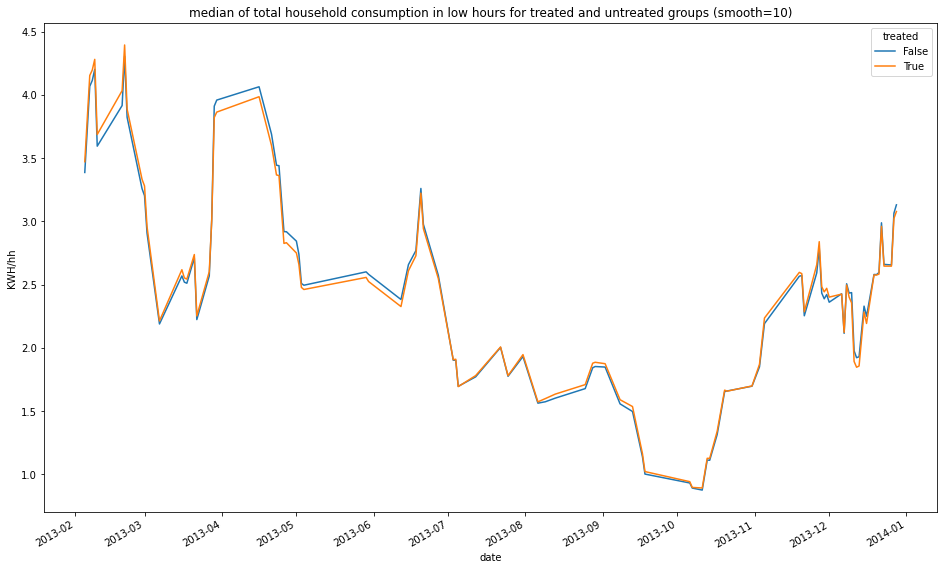

In [298]:
sum_median_usage_hh_2013_low.rolling(10).mean().plot(ylabel="KWH/hh", xlabel="date", 
            title="median of total household consumption in low hours for treated and untreated groups (smooth=10)", figsize=(16,10));

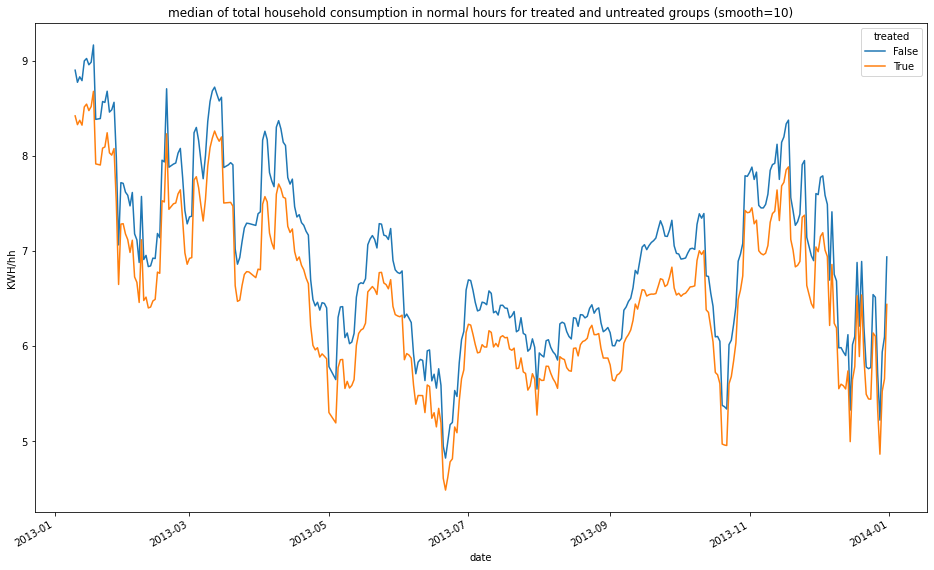

In [299]:
sum_median_usage_hh_2013_normal.rolling(10).mean().plot(ylabel="KWH/hh", xlabel="date", 
            title="median of total household consumption in normal hours for treated and untreated groups (smooth=10)", figsize=(16,10));

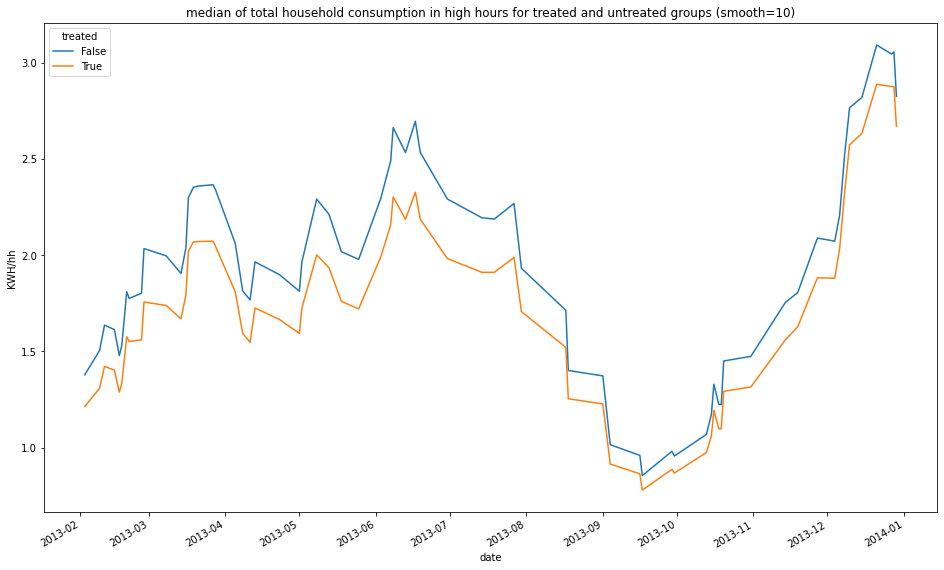

In [300]:
sum_median_usage_hh_2013_high.rolling(10).mean().plot(ylabel="KWH/hh", xlabel="date", 
            title="median of total household consumption in high hours for treated and untreated groups (smooth=10)", figsize=(16,10));

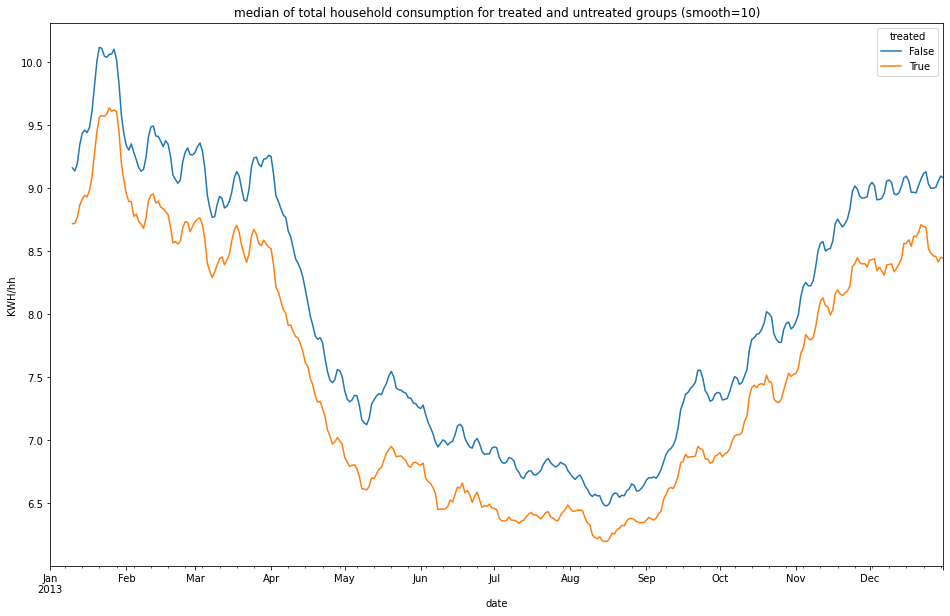

In [301]:
sum_median_usage_hh_2013.rolling(10).mean().plot(ylabel="KWH/hh", xlabel="date", 
            title="median of total household consumption for treated and untreated groups (smooth=10)", figsize=(16,10));

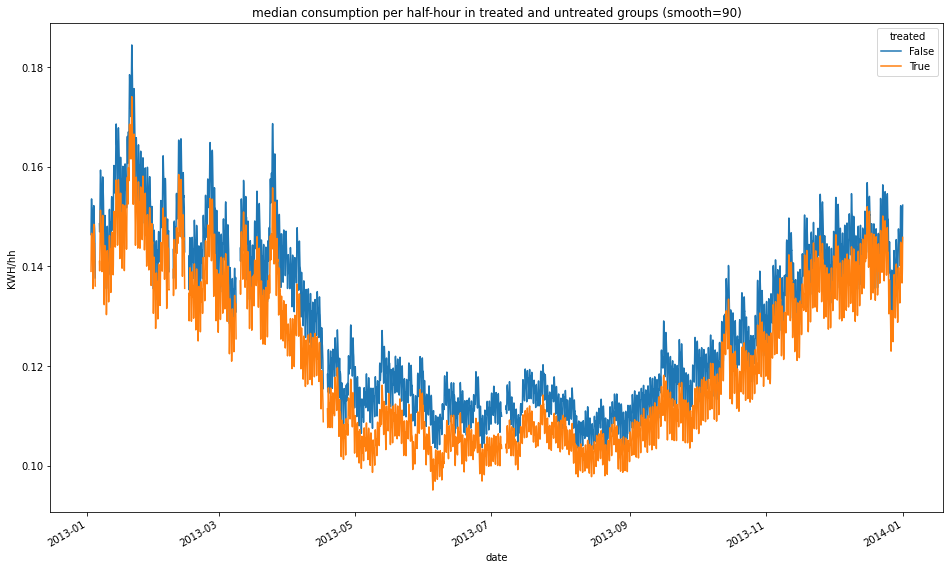

In [592]:
time_unstacked_median_usage_hh_2013.rolling(90).mean().plot(ylabel="KWH/hh", xlabel="date", 
                    title="median consumption per half-hour in treated and untreated groups (smooth=90)", figsize=(16,10));

In [748]:
time_unstacked_median_usage_hh_2013_nothigh.loc['2013-03-08']

treated               False  True 
date_time                         
2013-03-08 00:00:00  0.1150  0.115
2013-03-08 00:30:00  0.0970  0.097
2013-03-08 01:00:00  0.0860  0.084
2013-03-08 01:30:00  0.0800  0.076
2013-03-08 02:00:00  0.0770  0.071
2013-03-08 02:30:00  0.0740  0.069
2013-03-08 03:00:00  0.0720  0.067
2013-03-08 03:30:00  0.0730  0.065
2013-03-08 04:00:00  0.0710  0.066
2013-03-08 04:30:00  0.0700  0.067
2013-03-08 05:00:00  0.0730  0.066
2013-03-08 05:30:00  0.0765  0.070
2013-03-08 06:00:00  0.0810  0.075
2013-03-08 06:30:00  0.0950  0.083
2013-03-08 07:00:00  0.1080  0.102
2013-03-08 07:30:00  0.1280  0.122
2013-03-08 08:00:00  0.1420  0.137
2013-03-08 08:30:00  0.1450  0.136
2013-03-08 09:00:00  0.1370  0.132
2013-03-08 09:30:00  0.1310  0.128
2013-03-08 10:00:00  0.1285  0.122
2013-03-08 10:30:00  0.1250  0.113
2013-03-08 11:00:00  0.1180  0.115
2013-03-08 11:30:00  0.1215  0.115
2013-03-08 12:00:00  0.1240  0.115
2013-03-08 12:30:00  0.1265  0.123
2013-03-08 13:00:00  0.1300  0.127
2013-03-08 13:30:00  0.1260  0.126
2013-03-08 17:00:00  0.1680  0.152
2013-03-08 17:30:00  0.1850  0.178
2013-03-08 18:00:00  0.2020  0.200
2013-03-08 18:30:00  0.2310  0.235
2013-03-08 19:00:00  0.2445  0.240
2013-03-08 19:30:00  0.2400  0.236
2013-03-08 20:00:00  0.2335  0.215
2013-03-08 20:30:00  0.2250  0.219
2013-03-08 21:00:00  0.2210  0.213
2013-03-08 21:30:00  0.2160  0.209
2013-03-08 22:00:00  0.2060  0.202
2013-03-08 22:30:00  0.1940  0.186
2013-03-08 23:00:00  0.1690  0.162
2013-03-08 23:30:00  0.1430  0.139

In [745]:
highs.loc['2013-03-03':]

date_time
2013-03-08 14:00:00    High
2013-03-08 14:30:00    High
2013-03-08 15:00:00    High
2013-03-08 15:30:00    High
2013-03-08 16:00:00    High
                       ... 
2013-12-29 02:30:00    High
2013-12-29 03:00:00    High
2013-12-29 03:30:00    High
2013-12-29 04:00:00    High
2013-12-29 04:30:00    High
Name: tariff, Length: 630, dtype: object

In [780]:
time_unstacked_median_usage_hh_2013_high.loc['2013-01-07']

treated              False  True 
date_time                        
2013-01-07 23:00:00  0.180  0.174
2013-01-07 23:30:00  0.142  0.133

In [724]:
time_unstacked_median_usage_hh_2013.loc['2013-01-07']

treated              False   True 
date_time                         
2013-01-07 00:00:00  0.120  0.1120
2013-01-07 00:30:00  0.101  0.0930
2013-01-07 01:00:00  0.091  0.0810
2013-01-07 01:30:00  0.083  0.0740
2013-01-07 02:00:00  0.079  0.0700
2013-01-07 02:30:00  0.076  0.0700
2013-01-07 03:00:00  0.074  0.0650
2013-01-07 03:30:00  0.072  0.0670
2013-01-07 04:00:00  0.071  0.0660
2013-01-07 04:30:00  0.072  0.0660
2013-01-07 05:00:00  0.073  0.0690
2013-01-07 05:30:00  0.076  0.0700
2013-01-07 06:00:00  0.082  0.0740
2013-01-07 06:30:00  0.093  0.0820
2013-01-07 07:00:00  0.108  0.0980
2013-01-07 07:30:00  0.124  0.1180
2013-01-07 08:00:00  0.139  0.1280
2013-01-07 08:30:00  0.148  0.1320
2013-01-07 09:00:00  0.142  0.1365
2013-01-07 09:30:00  0.138  0.1270
2013-01-07 10:00:00  0.134  0.1270
2013-01-07 10:30:00  0.130  0.1310
2013-01-07 11:00:00  0.129  0.1230
2013-01-07 11:30:00  0.131  0.1210
2013-01-07 12:00:00  0.129  0.1240
2013-01-07 12:30:00  0.129  0.1260
2013-01-07 13:00:00  0.134  0.1270
2013-01-07 13:30:00  0.132  0.1340
2013-01-07 14:00:00  0.133  0.1305
2013-01-07 14:30:00  0.132  0.1240
2013-01-07 15:00:00  0.133  0.1310
2013-01-07 15:30:00  0.142  0.1380
2013-01-07 16:00:00  0.154  0.1590
2013-01-07 16:30:00  0.178  0.1860
2013-01-07 17:00:00  0.206  0.2130
2013-01-07 17:30:00  0.230  0.2280
2013-01-07 18:00:00  0.244  0.2360
2013-01-07 18:30:00  0.265  0.2500
2013-01-07 19:00:00  0.273  0.2640
2013-01-07 19:30:00  0.267  0.2560
2013-01-07 20:00:00  0.263  0.2470
2013-01-07 20:30:00  0.259  0.2390
2013-01-07 21:00:00  0.253  0.2390
2013-01-07 21:30:00  0.239  0.2240
2013-01-07 22:00:00  0.228  0.2110
2013-01-07 22:30:00  0.210  0.2050
2013-01-07 23:00:00  0.180  0.1740
2013-01-07 23:30:00  0.142  0.1330

In [712]:
nothigh_reset = time_unstacked_median_usage_hh_2013_nothigh.reset_index()
nothigh_reset.head()

treated           date_time  False   True
0       2013-01-01 00:00:00  0.149  0.137
1       2013-01-01 00:30:00  0.141  0.118
2       2013-01-01 01:00:00  0.121  0.112
3       2013-01-01 01:30:00  0.108  0.099
4       2013-01-01 02:00:00  0.097  0.089

In [714]:
high_reset = time_unstacked_median_usage_hh_2013_high.reset_index()
high_reset.head()

treated           date_time  False   True
0       2013-01-07 23:00:00  0.180  0.174
1       2013-01-07 23:30:00  0.142  0.133
2       2013-01-08 00:00:00  0.116  0.101
3       2013-01-08 00:30:00  0.099  0.085
4       2013-01-08 01:00:00  0.086  0.075

In [713]:
all_reset = time_unstacked_median_usage_hh_2013.reset_index()
all_reset.head()

treated           date_time  False   True
0       2013-01-01 00:00:00  0.149  0.137
1       2013-01-01 00:30:00  0.141  0.118
2       2013-01-01 01:00:00  0.121  0.112
3       2013-01-01 01:30:00  0.108  0.099
4       2013-01-01 02:00:00  0.097  0.089

In [759]:
df = time_unstacked_median_usage_hh_2013_high.reset_index()
df.head()

treated           date_time  False   True
0       2013-01-07 23:00:00  0.180  0.174
1       2013-01-07 23:30:00  0.142  0.133
2       2013-01-08 00:00:00  0.116  0.101
3       2013-01-08 00:30:00  0.099  0.085
4       2013-01-08 01:00:00  0.086  0.075

In [760]:
sum_high = df.groupby(df['date_time'].dt.normalize()).sum()
sum_high.head()

treated     False  True 
date_time               
2013-01-07  0.322  0.307
2013-01-08  0.382  0.334
2013-01-11  0.753  0.659
2013-01-13  1.381  1.203
2013-01-16  0.343  0.329

In [695]:
dfff = df.reset_index()

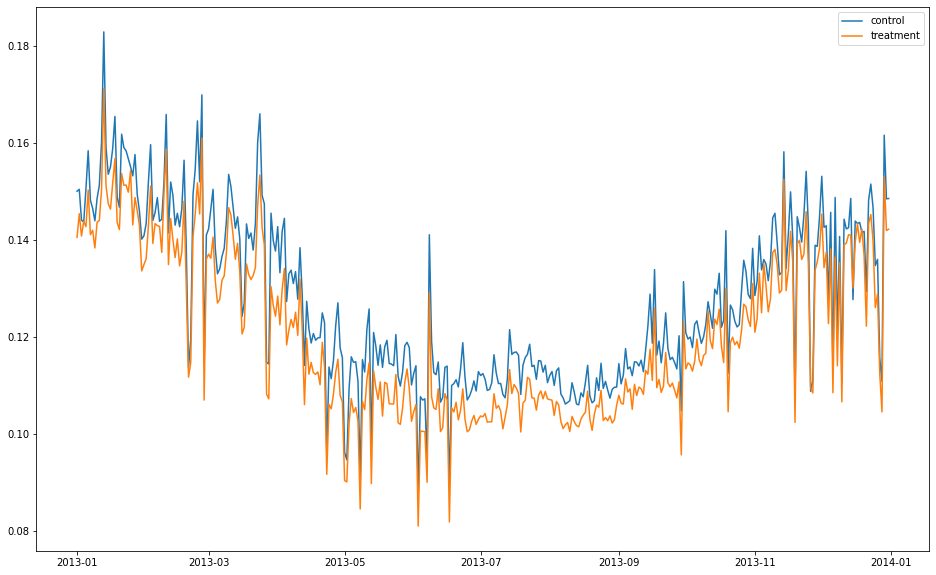

In [696]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)

ax1.plot(dfff['date_time'], dfff[False], label='control') # blue
ax1.plot(dfff['date_time'], dfff[True], label='treatment') # orange
plt.legend(loc='upper right');
plt.show()

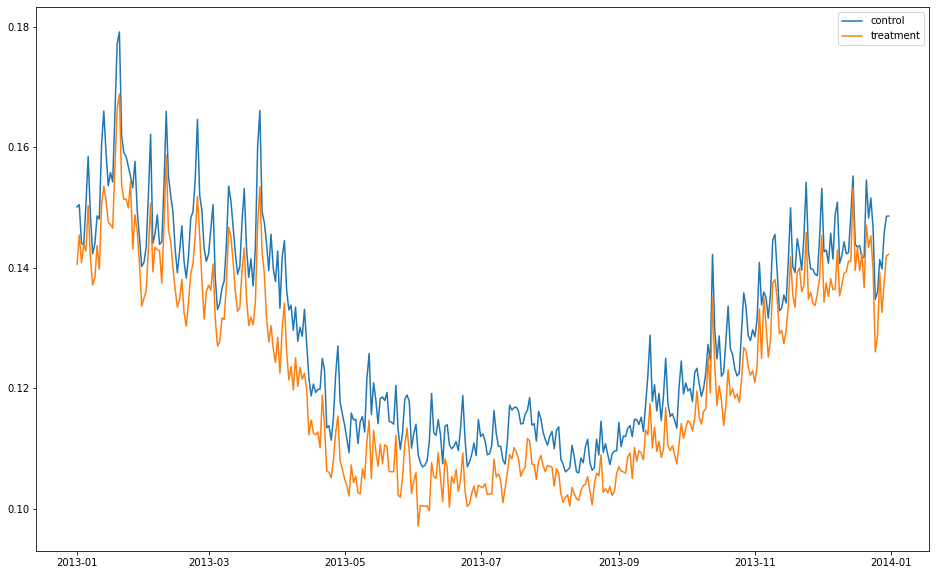

In [678]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)

ax1.plot(dff['date_time'], dff[False], label='control') # blue
ax1.plot(dff['date_time'], dff[True], label='treatment') # orange
plt.legend(loc='upper right');
plt.show()

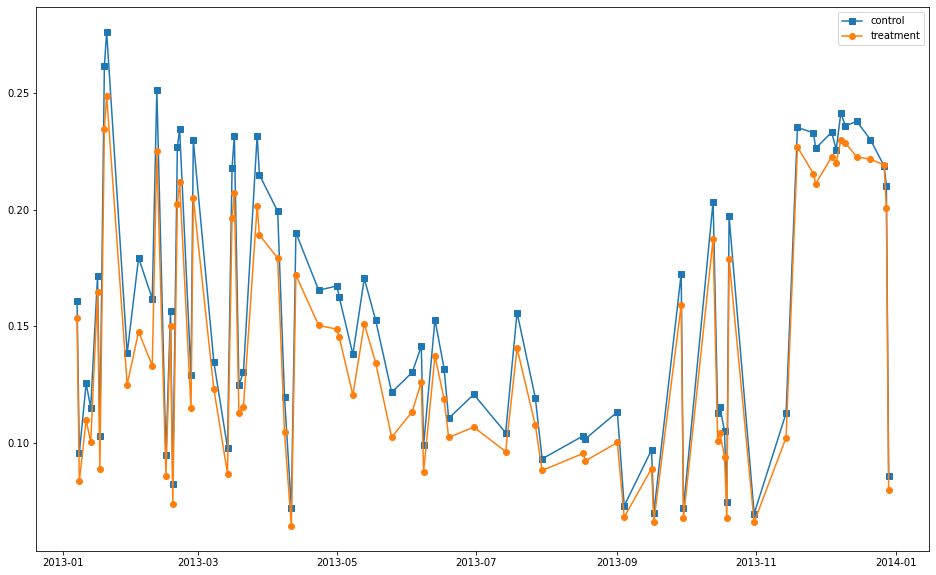

In [668]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)

ax1.plot(dff['date_time'], dff[False], marker="s", label='control') # blue
ax1.plot(dff['date_time'], dff[True], marker="o", label='treatment') # orange
plt.legend(loc='upper right');
plt.show()

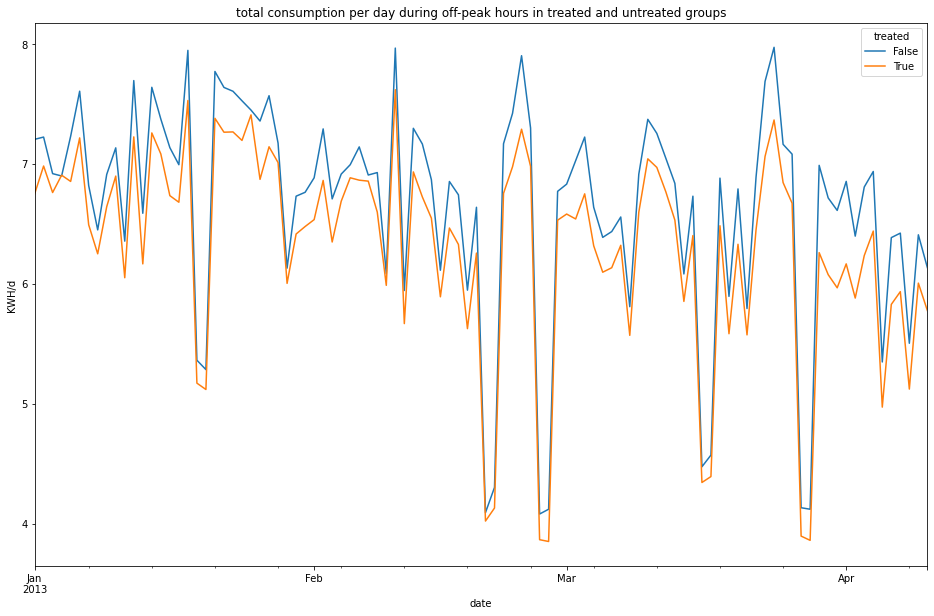

In [778]:
sum_nothigh[0:100].plot(ylabel="KWH/d", xlabel="date", 
       title="total consumption per day during off-peak hours in treated and untreated groups", figsize=(16,10));

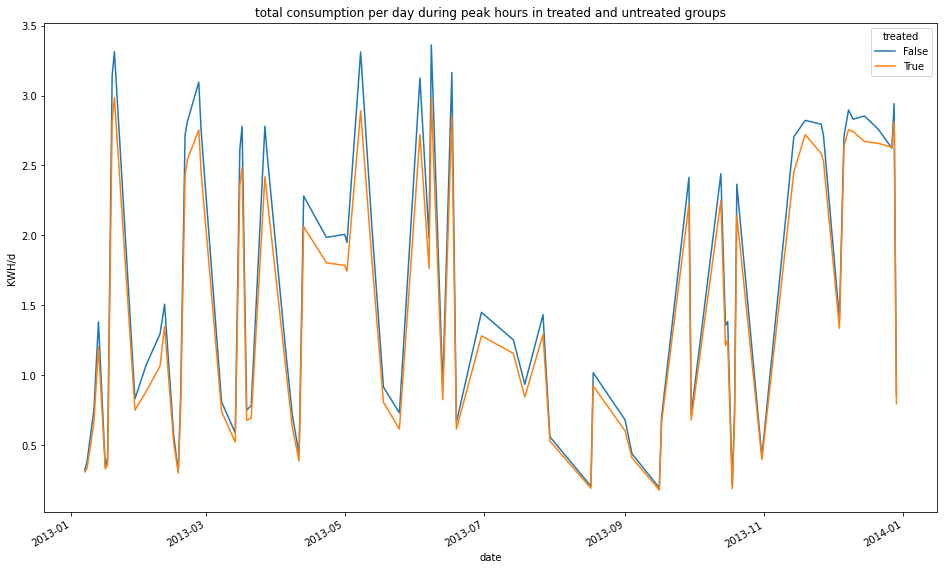

In [766]:
sum_high.plot(ylabel="KWH/d", xlabel="date", 
       title="total consumption per day during peak hours in treated and untreated groups", figsize=(16,10));

In [770]:
highs

date_time
2013-01-07 23:00:00    High
2013-01-07 23:30:00    High
2013-01-08 00:00:00    High
2013-01-08 00:30:00    High
2013-01-08 01:00:00    High
                       ... 
2013-12-29 02:30:00    High
2013-12-29 03:00:00    High
2013-12-29 03:30:00    High
2013-12-29 04:00:00    High
2013-12-29 04:30:00    High
Name: tariff, Length: 788, dtype: object

In [772]:
from dateutil.relativedelta import relativedelta

In [776]:
dt.now()

datetime.datetime(2021, 2, 9, 13, 53, 12, 840907)

In [777]:
dt.now() - relativedelta(years=1)

datetime.datetime(2020, 2, 9, 13, 53, 18, 229827)

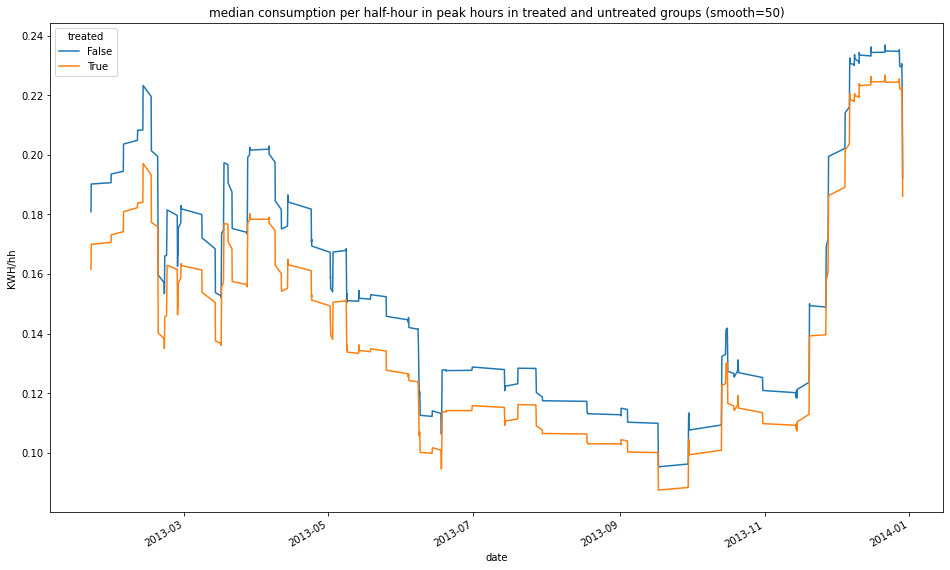

In [671]:
time_unstacked_median_usage_hh_2013_high.rolling(50).mean().plot(ylabel="KWH/hh", xlabel="date", 
       title="median consumption per half-hour in peak hours in treated and untreated groups (smooth=50)", figsize=(16,10));

In [751]:
time_unstacked_total_usage_date_2013 = total_usage_by_day_2013.groupby([total_usage_by_day_2013.index.get_level_values(0), 
                                               total_usage_by_day_2013['treated'] > 0])['KWH/hh'].median().unstack(level=-1)
time_unstacked_total_usage_date_2013_high = total_usage_by_day_2013_high.groupby(
    [total_usage_by_day_2013_high.index.get_level_values(0), 
     total_usage_by_day_2013_high['treated'] > 0])['KWH/hh'].median().unstack(level=-1)
time_unstacked_total_usage_date_2013.head()

treated      False  True 
date_time                
2013-01-01  9.3145  8.525
2013-01-02  9.3390  8.782
2013-01-03  8.9360  8.447
2013-01-04  8.9000  8.768
2013-01-05  9.1900  8.805

In [752]:
time_unstacked_total_usage_date_2013.head()

treated      False  True 
date_time                
2013-01-01  9.3145  8.525
2013-01-02  9.3390  8.782
2013-01-03  8.9360  8.447
2013-01-04  8.9000  8.768
2013-01-05  9.1900  8.805

In [753]:
time_unstacked_total_usage_date_2013_high.head()

treated     False   True 
date_time                
2013-01-07  0.331  0.3260
2013-01-08  0.401  0.3500
2013-01-11  0.885  0.7750
2013-01-13  1.672  1.4590
2013-01-16  0.354  0.3335

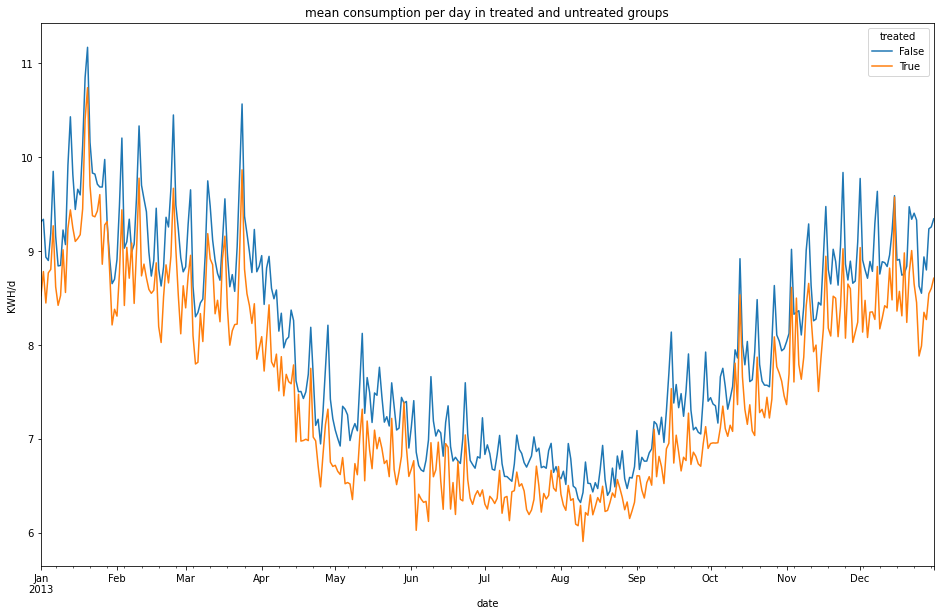

In [754]:
time_unstacked_total_usage_date_2013.rolling(1).mean().plot(ylabel="KWH/d", xlabel="date", 
                               title="mean consumption per day in treated and untreated groups", figsize=(16,10));

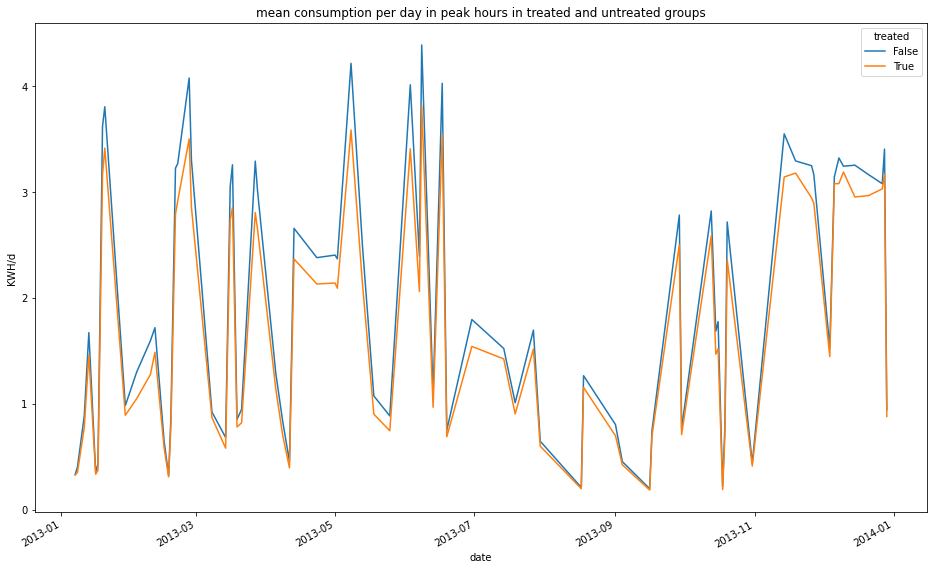

In [755]:
time_unstacked_total_usage_date_2013_high.rolling(1).mean().plot(ylabel="KWH/d", xlabel="date", 
                               title="mean consumption per day in peak hours in treated and untreated groups", figsize=(16,10));

In [68]:
tariffs_mean_joined = tariffs.join(time_stacked_mean_hh, on='date_time', how='left')
tariffs_mean_joined.head()

date_time  tariff  price p/kWh     False      True
0 2013-01-01 00:00:00  Normal        11.76  0.261270  0.210156
1 2013-01-01 00:30:00  Normal        11.76  0.240669  0.195416
2 2013-01-01 01:00:00  Normal        11.76  0.219610  0.181383
3 2013-01-01 01:30:00  Normal        11.76  0.201582  0.165533
4 2013-01-01 02:00:00  Normal        11.76  0.184829  0.150789

In [70]:
tariffs_mean_joined['avg_price_standard p/kWh'] = tariffs_mean_joined[False] * 14.228
tariffs_mean_joined['avg_price_ToU p/kWh'] = tariffs_mean_joined[True] * tariffs_mean_joined['price p/kWh']
tariffs_mean_joined['difference'] = (tariffs_mean_joined['avg_price_standard p/kWh'] - tariffs_mean_joined['avg_price_ToU p/kWh'])*100 / tariffs_mean_joined['avg_price_standard p/kWh']

tariffs_mean_joined

date_time  tariff  price p/kWh     False      True  \
0     2013-01-01 00:00:00  Normal        11.76  0.261270  0.210156   
1     2013-01-01 00:30:00  Normal        11.76  0.240669  0.195416   
2     2013-01-01 01:00:00  Normal        11.76  0.219610  0.181383   
3     2013-01-01 01:30:00  Normal        11.76  0.201582  0.165533   
4     2013-01-01 02:00:00  Normal        11.76  0.184829  0.150789   
...                   ...     ...          ...       ...       ...   
17515 2013-12-31 21:30:00  Normal        11.76  0.312304  0.296010   
17516 2013-12-31 22:00:00  Normal        11.76  0.295147  0.276025   
17517 2013-12-31 22:30:00  Normal        11.76  0.282948  0.261241   
17518 2013-12-31 23:00:00  Normal        11.76  0.266107  0.236671   
17519 2013-12-31 23:30:00  Normal        11.76  0.251079  0.223456   

       avg_price_standard p/kWh  avg_price_ToU p/kWh  difference  
0                      3.717342             2.471431   33.516182  
1                      3.424241             2.298090   32.887599  
2                      3.124605             2.133059   31.733501  
3                      2.868103             1.946666   32.127051  
4                      2.629744             1.773283   32.568223  
...                         ...                  ...         ...  
17515                  4.443462             3.481073   21.658541  
17516                  4.199346             3.246054   22.700966  
17517                  4.025790             3.072196   23.687142  
17518                  3.786165             2.783256   26.488767  
17519                  3.572352             2.627846   26.439324  

[17520 rows x 8 columns]

In [24]:
time_stacked_mean_hh['difference'] = (time_stacked_mean_hh[False] - time_stacked_mean_hh[True])*100 / time_stacked_mean_hh[False]

In [ ]:
mean_by_date = total_usage.groupby([pd.Grouper(key="date_time", freq="1D"), "treated"]).mean()

In [ ]:
# The tariff prices were given a day ahead via the Smart Meter IHD (In Home Display) 
# or text message to mobile phone. Customers were issued High (67.20p/kWh), 
# Low (3.99p/kWh) or normal (11.76p/kWh) price signals and the times of day 
# these applied. The dates/times and the price signal schedule is availaible 
# as part of this dataset. All non-Time of Use customers were on a flat rate 
# tariff of 14.228pence/kWh.

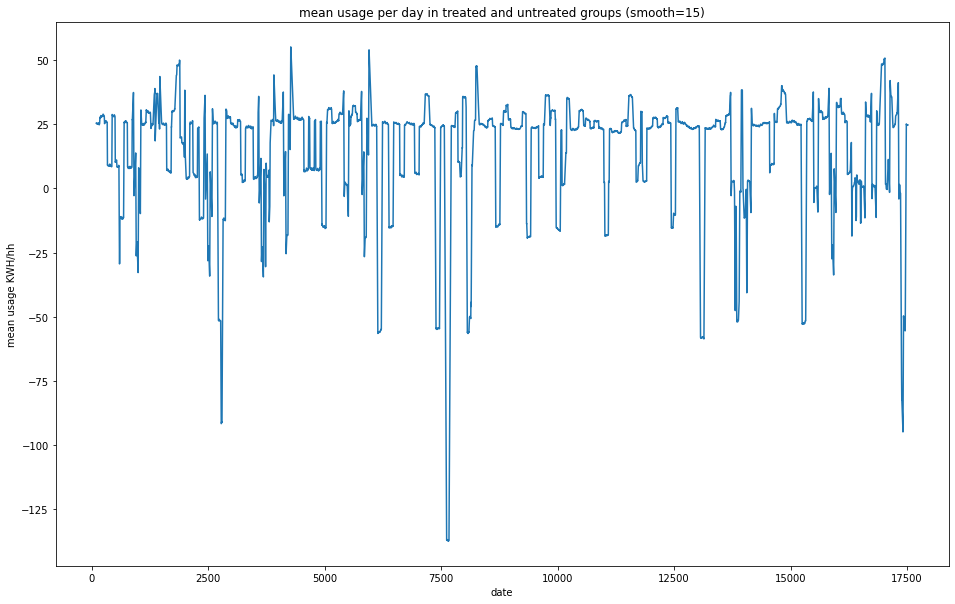

In [74]:
tariffs_mean_joined['difference'].rolling(100).mean().plot(ylabel="mean usage KWH/hh", xlabel="date", 
                               title="mean usage per day in treated and untreated groups (smooth=15)", figsize=(16,10));

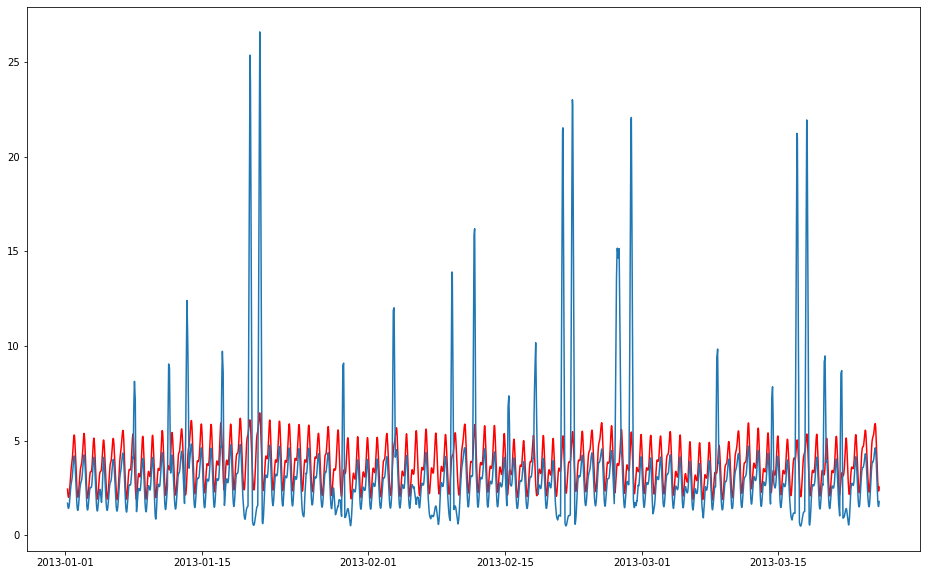

In [98]:
# fig, ax = plt.subplots()

plt.figure(figsize=(16,10))

plt.plot(tariffs_mean_joined['date_time'][1:4000], tariffs_mean_joined['avg_price_standard p/kWh'][1:4000].rolling(10).mean(), 'r')
plt.plot(tariffs_mean_joined['date_time'][1:4000], tariffs_mean_joined['avg_price_ToU p/kWh'][1:4000].rolling(10).mean())

plt.show()

In [96]:
tariffs_mean_joined['date_time'][300:350]

300   2013-01-07 06:00:00
301   2013-01-07 06:30:00
302   2013-01-07 07:00:00
303   2013-01-07 07:30:00
304   2013-01-07 08:00:00
305   2013-01-07 08:30:00
306   2013-01-07 09:00:00
307   2013-01-07 09:30:00
308   2013-01-07 10:00:00
309   2013-01-07 10:30:00
310   2013-01-07 11:00:00
311   2013-01-07 11:30:00
312   2013-01-07 12:00:00
313   2013-01-07 12:30:00
314   2013-01-07 13:00:00
315   2013-01-07 13:30:00
316   2013-01-07 14:00:00
317   2013-01-07 14:30:00
318   2013-01-07 15:00:00
319   2013-01-07 15:30:00
320   2013-01-07 16:00:00
321   2013-01-07 16:30:00
322   2013-01-07 17:00:00
323   2013-01-07 17:30:00
324   2013-01-07 18:00:00
325   2013-01-07 18:30:00
326   2013-01-07 19:00:00
327   2013-01-07 19:30:00
328   2013-01-07 20:00:00
329   2013-01-07 20:30:00
330   2013-01-07 21:00:00
331   2013-01-07 21:30:00
332   2013-01-07 22:00:00
333   2013-01-07 22:30:00
334   2013-01-07 23:00:00
335   2013-01-07 23:30:00
336   2013-01-08 00:00:00
337   2013-01-08 00:30:00
338   2013-0

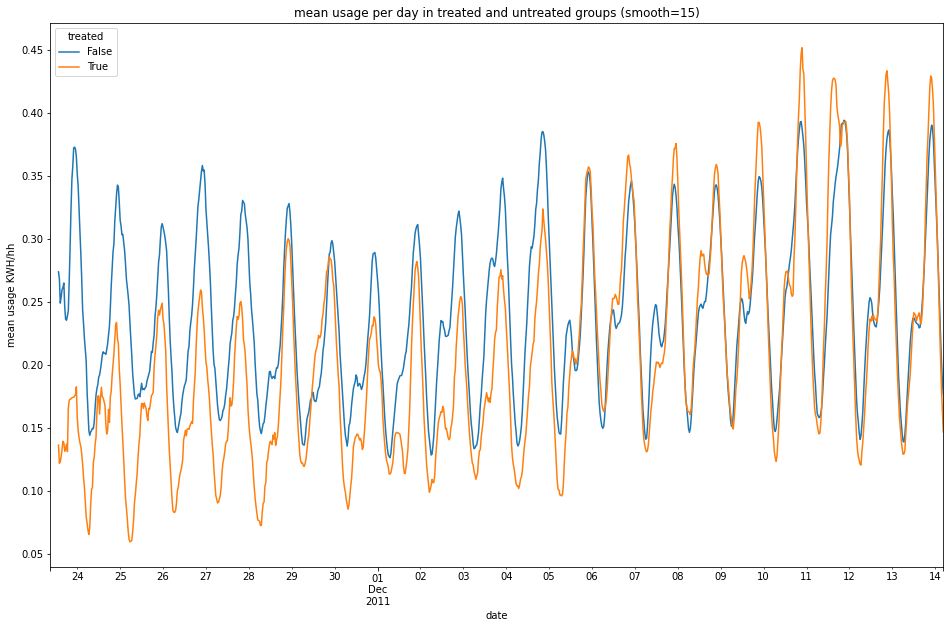

In [56]:
time_stacked_mean_hh[0:1000].rolling(10).mean().plot(ylabel="mean usage KWH/hh", xlabel="date", 
                               title="mean usage per day in treated and untreated groups (smooth=15)", figsize=(16,10));

Now we want to see if the treatment affected usage, so we group based on date and compare the mean and median uses for treated and untreated groups

In [12]:
mean_by_date = total_usage.groupby([pd.Grouper(key="date_time", freq="1D"), "treated"]).mean()
median_by_date = total_usage.groupby([pd.Grouper(key="date_time", freq="1D"), "treated"]).median()

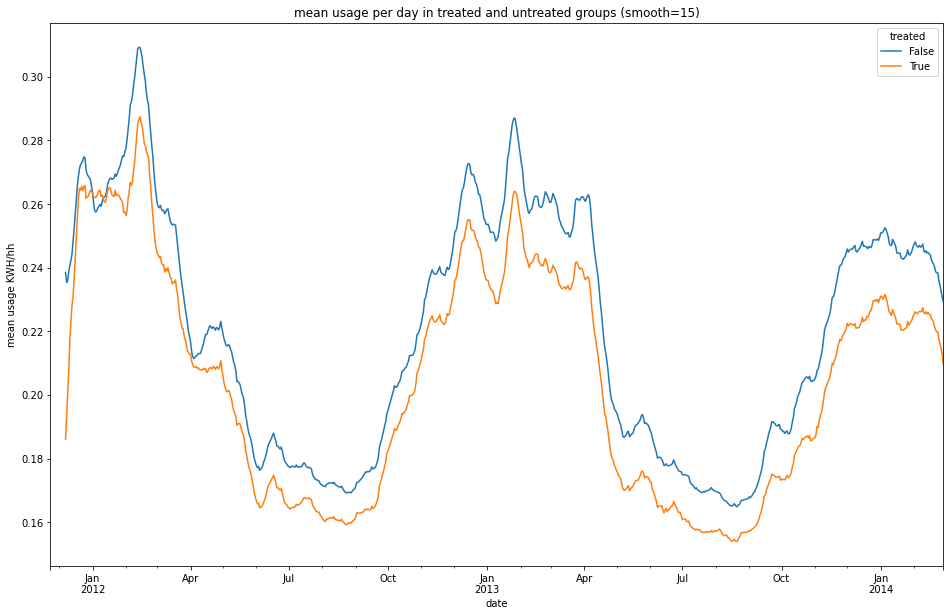

In [13]:
time_stacked_mean = mean_by_date['KWH/hh'].unstack()
time_stacked_mean.rolling(15).mean().plot(ylabel="mean usage KWH/hh", xlabel="date", 
                               title="mean usage per day in treated and untreated groups (smooth=15)", figsize=(16,10));

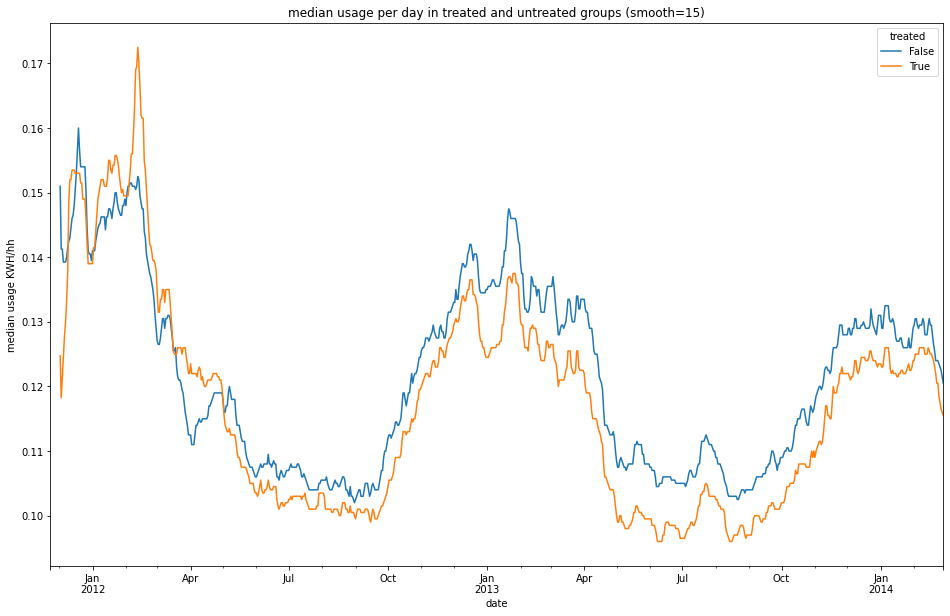

In [14]:
time_stacked_median = median_by_date['KWH/hh'].unstack()
time_stacked_median.rolling(10).median().plot(ylabel="median usage KWH/hh", xlabel="date", 
                               title="median usage per day in treated and untreated groups (smooth=15)", figsize=(16,10));

**What does it mean that the median plot has a lower usage than the mean?**
There perhaps were more higher using population (both treated and untreated) than lower such that 
the mean is almost 2x the median. Both groups are trailing similarly though so I'm not sure what 
that means with regards to classification among the group.

So now the question is, how do we seperate the treated group into the three categories of high/medium/low price sensitivity.

doing this with the mean df for now.

In [12]:
sorted_mean = pd.DataFrame(sorted(time_stacked_mean[True]), columns =['mean KWH/hh'])

In [13]:
len(sorted(time_stacked_mean[True]))*2/3

552.6666666666666

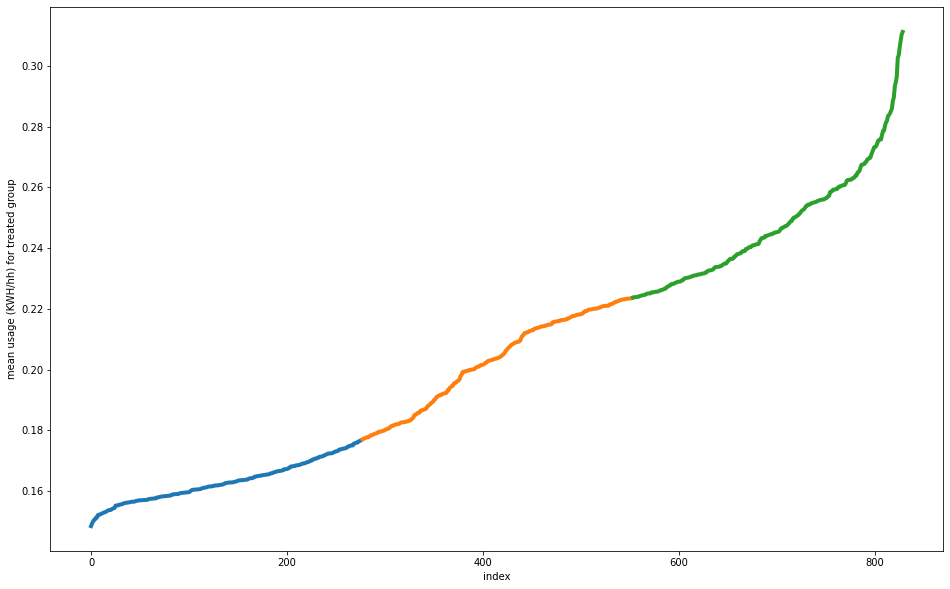

In [17]:
plt.figure(figsize=(16,10))
plt.plot(sorted_mean[0:276], linewidth=4)
plt.plot(sorted_mean[277:553], linewidth=4)
plt.plot(sorted_mean[553:829], linewidth=4)
plt.xlabel('index')
plt.ylabel('mean usage (KWH/hh) for treated group')
plt.show()
# do per kwh/hh - diluted now
# look at the difference
# synthethic control gives the features of the synthethic control
# method. what about the price sensitivity tho?

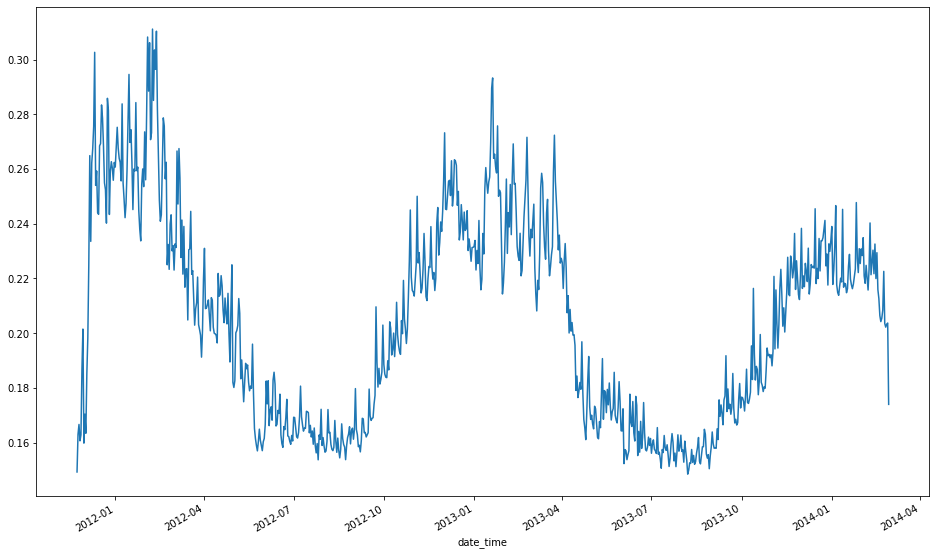

In [154]:
time_stacked_mean.sort_values(by=[True])[True].plot(figsize=(16,10));

In [122]:
sorted(time_stacked_mean[True]).plot(figsize=(16,10));

AttributeError: 'list' object has no attribute 'plot'

In [ ]:
#### rest is bs

In [101]:
# time_stacked = time_stacked.rename(columns={"True": "x", "False": "y"})

time_stacked = time_stacked.rename({"True": "x", "False": "y"}, axis='columns')

In [102]:
time_stacked.head()

treated        False     True 
date_time                     
2011-11-23  0.149224  0.296123
2011-11-24  0.162980  0.244773
2011-11-25  0.166605  0.231432
2011-11-26  0.160615  0.252336
2011-11-27  0.162781  0.236906

In [11]:
# the true and false labels here are flipped

# time_stacked.axes
# time_stacked.columns

In [82]:
time_stacked.axes

[DatetimeIndex(['2011-11-23', '2011-11-24', '2011-11-25', '2011-11-26',
                '2011-11-27', '2011-11-28', '2011-11-29', '2011-11-30',
                '2011-12-01', '2011-12-02',
                ...
                '2014-02-19', '2014-02-20', '2014-02-21', '2014-02-22',
                '2014-02-23', '2014-02-24', '2014-02-25', '2014-02-26',
                '2014-02-27', '2014-02-28'],
               dtype='datetime64[ns]', name='date_time', length=829, freq='D'),
 Index([False, True], dtype='object', name='treated')]

In [100]:
time_stacked[True]

date_time
2011-11-23    0.296123
2011-11-24    0.244773
2011-11-25    0.231432
2011-11-26    0.252336
2011-11-27    0.236906
                ...   
2014-02-24    0.220452
2014-02-25    0.218179
2014-02-26    0.215452
2014-02-27    0.219021
2014-02-28    0.218075
Freq: D, Name: True, Length: 829, dtype: float64

In [58]:
time_smoothed = time_stacked.rolling(15).mean()

In [79]:
fig = plt.figure(figsize=(16, 10))
# ax.plot(time_smoothed, '-b', label='treated')
fig.plt(time_smoothed)
leg = fig.legend(['treated', 'untreated']);

AttributeError: 'Figure' object has no attribute 'plt'

<Figure size 1152x720 with 0 Axes>

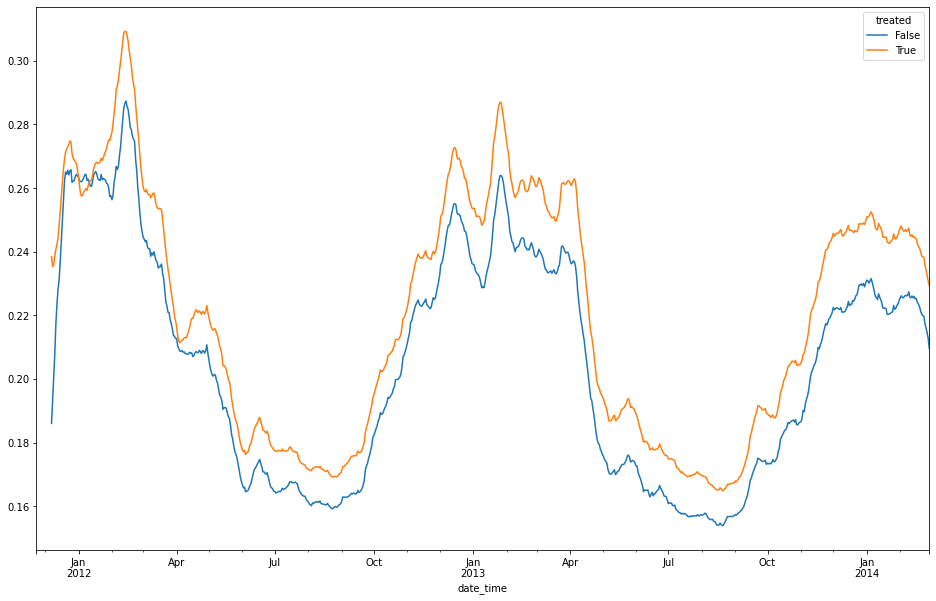

In [9]:
MAC000036 = total_usage[total_usage.house_id == 'MAC000036']

In [11]:
MAC000036.head()

house_id  treated                    date_time  KWH/hh
983825  MAC000036     True  2011-12-07 15:00:00.0000000   0.083
983826  MAC000036     True  2011-12-07 15:30:00.0000000   0.055
983827  MAC000036     True  2011-12-07 16:00:00.0000000   0.043
983828  MAC000036     True  2011-12-07 16:30:00.0000000   0.267
983829  MAC000036     True  2011-12-07 17:00:00.0000000   0.060

In [192]:
len(total_usage)

167932474

In [81]:
mean_usage_per_house = total_usage.groupby(['house_id'], as_index=False).mean()

In [82]:
mean_usage_per_house_treated = mean_usage_per_house[mean_usage_per_house.treated == True]
mean_usage_per_house_not_treated = mean_usage_per_house[mean_usage_per_house.treated == False]

In [223]:
test = total_usage[0:100]

In [231]:
#  = total_usage.groupby(pd.Grouper(key="date_time", freq="1D"))

In [233]:
grouper

KWH/hh
date_time  treated          
2011-11-23 False    0.149224
           True     0.296123
2011-11-24 False    0.162980
           True     0.244773
2011-11-25 False    0.166605
...                      ...
2014-02-26 True     0.215452
2014-02-27 False    0.203687
           True     0.219021
2014-02-28 False    0.173949
           True     0.218075

[1658 rows x 1 columns]

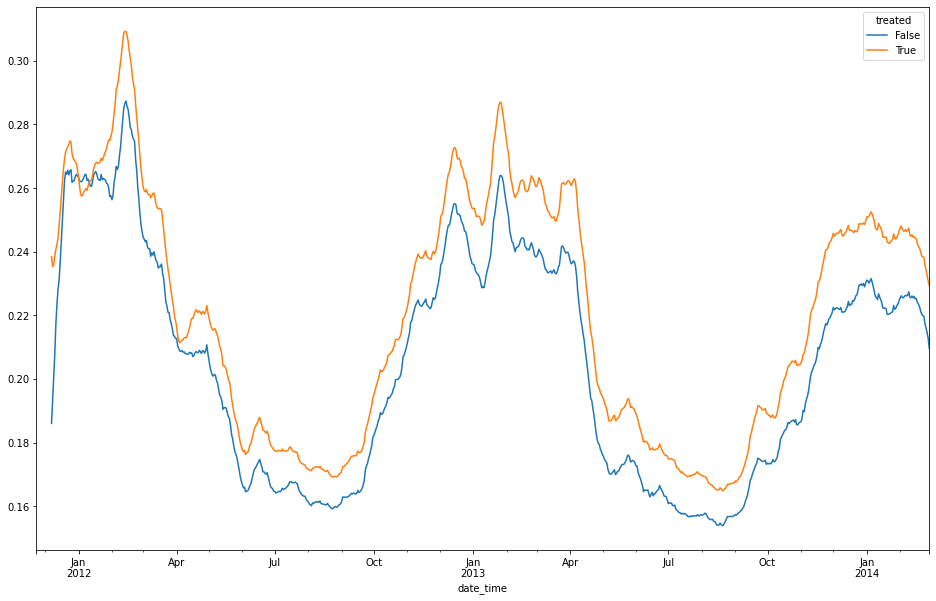

In [266]:
time_stacked = grouper['KWH/hh'].unstack()
time_stacked.rolling(15).mean().plot(figsize=(16,10));

In [243]:
grouped_by_date_treated = grouper.loc[np.s_[:, True], :].reset_index(level=1, drop=True)
grouped_by_date_not_treated = grouper.loc[np.s_[:, False], :].reset_index(level=1, drop=True)

<Figure size 1152x720 with 0 Axes>

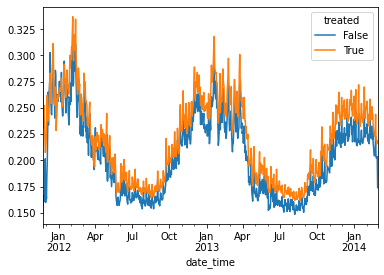

In [258]:
plt.figure(figsize=(16, 10))

plt.plot(time_stacked['True'])
plt.plot(time_stacked['False'])

plt.show();

In [154]:
type(grouper)

pandas.core.frame.DataFrame

In [155]:
grouper

treated    KWH/hh
date_time                    
2012-10-12     True  0.157733
2012-10-13     True  0.230979
2012-10-14     True  0.158333

In [19]:
date_36 = MAC000036.groupby(['date_time'], as_index=False).mean()

In [20]:
date_36.head()

date_time  treated  KWH/hh
0  2011-12-07 15:00:00.0000000     True   0.083
1  2011-12-07 15:30:00.0000000     True   0.055
2  2011-12-07 16:00:00.0000000     True   0.043
3  2011-12-07 16:30:00.0000000     True   0.267
4  2011-12-07 17:00:00.0000000     True   0.060

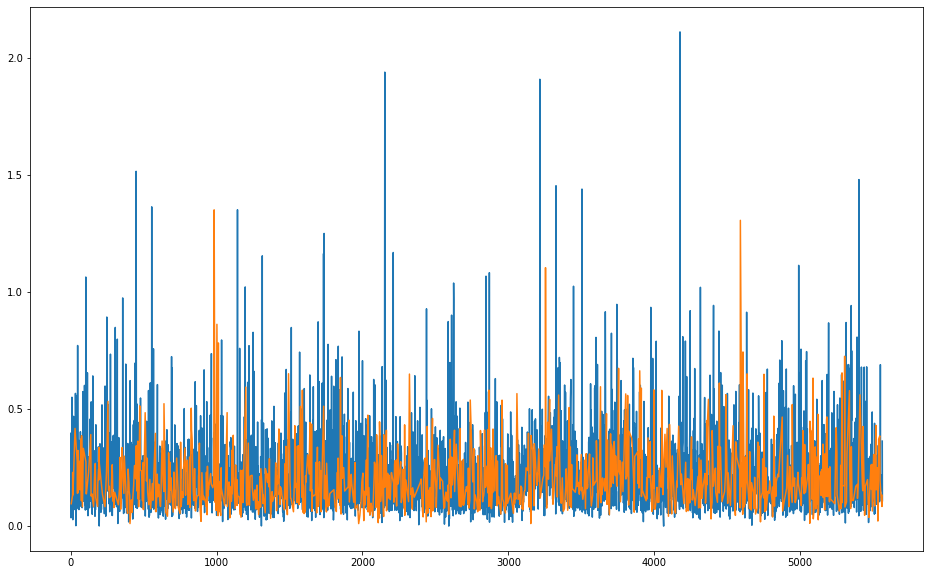

In [88]:
plt.figure(figsize=(16, 10))

plt.plot(mean_usage_per_house_treated['KWH/hh'])
plt.plot(mean_usage_per_house_not_treated['KWH/hh'])

plt.show();
# mean_usage_per_house_not_treated[1:300].plot(y='KWH/hh', )
# plt.xticks(rotation='vertical');

In [27]:
# they all go from 2012-07-06 (changes) to 2014-02-28
# task 1: for the ones that went through treatment get the mean/median
# compare to the median from the group that didn't go through treatment - should be lower
# from the treated, find a group that is more or less sensitive to price;
# less than -sigma, -sigma to +sigma, more than +sigma
# lowering total usage and shifting usage
# and then see how much this is correlated to the Acorn grouping